# 量子振幅推定と数値積分

量子振幅推定の具体的な応用例として、数値積分計算が挙げられます。 

参考文献: https://arxiv.org/abs/2008.02102

### 数値積分

まず数値積分とは、コンピュータで数値的に行う積分計算です。  
イメージとしては区分求積法です。

<img width="25%" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Integral_approximations.svg">

(参考: https://ja.wikipedia.org/wiki/%E7%A9%8D%E5%88%86%E6%B3%95)

積分したい区間を有限個の小区間に分けて、積分したい関数を近似します。  
積分値は小区間の面積の総和として、数値的に計算することができます。  
この方法で求まる積分値はあくまで近似値で、区間をどれだけ細かく区切るかによって近似の精度が決まります。

対して学校で習う定積分は解析的な積分であり、数値積分とは異なります。  
例えば $f(x) = x^2$ のような関数は以下のように、手計算で解析的に積分可能です。

$$
\int^1_0 x^2 dx = \biggl[ \frac{x^3}{3} \biggr]^1_0 = \frac{1}{3}
$$

解析的な積分は近似誤差が生じない点で数値積分より優れてますが、複雑な関数になると解析的な積分計算を行うのが困難なため、数値積分も多く用いられます。  
量子振幅推定は、この数値積分を古典計算と比較して2乗加速することが知られています。

### 量子振幅推定を用いた数値積分

ある関数$f(x)$の積分を求めるためは、以下のような状態を用意します。  
$\{x_i\}\ \ (i=0, ..., 2^n-1)$ は区分求積法における各小区間内の代表点です。

$$
|\psi\rangle = \sum^{2^n-1}_{i=0}\frac{1}{\sqrt{2^n}} \lvert i\rangle_n \bigl(\sqrt{1-f(x_i)}\lvert0\rangle_A + \sqrt{f(x_i)} \lvert1\rangle_A \bigr)
$$

$\lvert0\rangle_A$, $\lvert1\rangle_A$ は各状態のラベル付けに用いる補助量子ビットです。ここでは $\lvert1\rangle_A$ である状態の振幅を推定します。

$\lvert1\rangle_A$ の振幅を計算すると、$\sum^{2^n-1}_{i=0} \biggl(\frac{\sqrt{f(x_i)}}{\sqrt{2^n}}\biggr)^2  = \sum^{2^n-1}_{i=0} \frac{f(x_i)}{2^n}$ となります。これはまさに区分求積法の計算と同じです。  

よって、上記のような状態を用意する量子ゲート $\mathcal{A}$  ($\lvert \psi\rangle = \mathcal{A}\lvert 0\rangle$)があれば良いことになります。  

以下の例では、$f(x) = \sin^2x$に対応する$|\psi\rangle$を用意します。  
この例はRYゲートの性質を用いて非常に効率的に実装できます。

In [1]:
from blueqat import Circuit
import numpy as np
import matplotlib.pyplot as plt

$\mathcal{A}$ を実装します。

以下は３量子ビット回路で、量子ビット $q_0$ はラベル用の補助量子ビットです。

<img width="40%" src="./img/113_img.png">

この回路を用いた場合に、 $f(x) = \sin^2 x$ について $\lvert \psi\rangle = \mathcal{A}\lvert 0\rangle$ となることを確認してみましょう。  

まず $q_1$, $q_2$ に $H$ ゲートを用いて $\lvert 00 \rangle, \lvert 01 \rangle, \lvert 10 \rangle, \lvert 11 \rangle$ の重ね合わせ状態を作ります。  
次に $q_1$, $q_2$ を制御量子ビットとして、回転角を変えながら $q_0$ に $Ry$ ゲートを作用させます。

$$
\begin{align}
&\frac{1}{2} \lvert 0 \rangle (\lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle) \\
\xrightarrow{Ry(\pi/16)} &\frac{1}{2} \biggl(\cos \bigl(\frac{\pi}{32} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32}\bigr)\vert1\rangle \biggr) (\lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle) \\
\xrightarrow{CRy(\pi/8)} &\frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32}\bigr)\vert1\rangle \biggr) (\lvert 00 \rangle + \lvert 01 \rangle) + \frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} + \frac{\pi}{16} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32} + \frac{\pi}{16}\bigr)\vert1\rangle \biggr)(\lvert 10 \rangle + \lvert 11 \rangle) \\
\xrightarrow{CRy(\pi/4)} &\frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32}\bigr)\vert1\rangle \biggr) \lvert 00 \rangle \\
&+ \frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} + \frac{\pi}{16} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32} + \frac{\pi}{16}\bigr)\vert1\rangle \biggr) \lvert 01 \rangle \\
&+ \frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} + \frac{\pi}{8} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32} + \frac{\pi}{8}\bigr)\vert1\rangle \biggr) \lvert 10 \rangle \\
&+ \frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} + \frac{\pi}{8} + \frac{\pi}{16} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32} + \frac{\pi}{8} + \frac{\pi}{16}\bigr)\vert1\rangle \biggr) \lvert 11 \rangle
\end{align}
$$

$q_0 = 1$ を測定する確率 $\mathrm{Pr}(q_0=1)$ は以下の通りです。

$$
\frac{1}{4} \bigl\{ \sin^2\bigl(\frac{1}{8} \cdot\frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{3}{8} \cdot \frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{5}{8} \cdot\frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{7}{8} \cdot\frac{\pi}{4}\bigr) \bigr\} = 0.1796...
$$

次に、$f(x)=\sin^2 x$ について区間 $[0, \frac{\pi}{4}]$ を4分割し、代表点を各区間の中点 $\{x_i\} = \{ \frac{\pi}{32}, \frac{3\pi}{32}, \frac{5\pi}{32}, \frac{7\pi}{32} \}$ とした区分求積法は次の通りです。

$$
\sum^3_{i=0} \sin^2 x_i \cdot \frac{\pi/4}{4} = \frac{\pi}{4}\cdot\frac{1}{4}\bigl\{ \sin^2\bigl(\frac{1}{8} \cdot\frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{3}{8} \cdot \frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{5}{8} \cdot\frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{7}{8} \cdot\frac{\pi}{4}\bigr) \bigr\}=0.1410...
$$

積分区間を表す係数 $\frac{\pi}{4}$ を除き、$\mathrm{Pr}(q_0=1)$ と等しいことがわかります。  
以上から、量子振幅推定により $\mathrm{Pr}(q_0=1)$ を求めることで数値積分の結果が得られることがわかりました。  

ここでのポイントは、$q_1$, $q_2$ の重ね合わせ状態 $\lvert 00 \rangle, \lvert 01 \rangle, \lvert 10 \rangle, \lvert 11 \rangle$ を用いて、4通りの代表点 $\{x_i\}$ についての計算を一度に実行していることです。  
より多くの量子ビットを用いればより多くの小区間に区切った数値積分を行うことができ、近似精度を上げることができます。

以下がblueqatによる $\mathcal{A}$ の実装です。

In [8]:
n_encode = 2 # 小区間の数を決める
b = np.pi / 4 # 積分区間
alpha = 0.5 # 代表点の位置を決めるファクタ, 0.5　の場合は各区間の中央

def U_A(qc, n_encode, b, alpha):
    for i in range(n_encode):
        qc.h[i + 1]
    qc.ry(alpha * b / 2**(n_encode - 1))[0]
    for i in range(n_encode):
        qc.cry(b / 2**(n_encode - i - 1))[i + 1, 0]

In [7]:
qc = Circuit(1 + n_encode)
U_A(qc, n_encode, b, alpha)
qc.m[0]
res = qc.run(shots = 10000)
res

Counter({'000': 8151, '100': 1849})

$0.1796...$ に近い確率で、補助量子ビットで'1'が測定されています。

次に、振幅推定に用いるオラクルを用意します。  
振幅増幅用のオラクルと同じです。

In [15]:
def U_Adg(qc, n_encode, b, alpha):
    for i in reversed(range(n_encode)):
        qc.cry(-b / 2**(n_encode - i - 1))[i + 1, 0]
    qc.ry(-alpha * b / 2**(n_encode - 1))[0]
    for i in range(n_encode):
        qc.h[i + 1]
        
def U_S0(qc, n_encode, b, alpha):
    for i in range(1 + n_encode):
        qc.x[i]
    qc.h[0].ccx[1, 2, 0].h[0] # ここを一般化Toffoliゲートに置き換えない限り n_encode = 2 に限る
    for i in range(1 + n_encode):
        qc.x[i]
        
def U_Sx(qc):
    qc.z[0]
    
    
# 振幅増幅オラクル
def Q(qc):
    U_Sx(qc)
    U_Adg(qc, n_encode, b, alpha)
    U_S0(qc, n_encode, b, alpha)
    U_A(qc, n_encode, b, alpha)

これらのオラクルを用いて振幅増幅ができていることを確認します。

In [16]:
qc = Circuit(1 + n_encode)

U_A(qc, n_encode, b, alpha)
Q(qc)

qc.m[0]

res = qc.run(shots = 10000)
res

Counter({'100': 9331, '000': 669})

'1' を測定する確率が増幅されており、OKです。

### 量子位相推定を用いない量子振幅推定

オリジナルの量子振幅推定では、オラクルについて量子位相推定を行って振幅を推定しました。  
しかし量子位相推定は精度を上げるにつれ多くの補助量子ビットを必要とし、量子回路の規模が大きくなってしまいます。  

そこで近年は、量子位相推定を用いない方法が複数提案されています。  
その1つとして、以下の尤度関数 $L(h;\theta)$ を最大化します。

$$
L_k (h_k;\theta) = \{ \sin^2((2m_k+1)\theta) \}^{h_k} \{ \cos^2((2m_k+1)\theta) \}^{N - h_k}
$$


$$
L(h;\theta) = \prod^M_{k=0}L_k (h_k;\theta)
$$

$\sin^2\theta$　は補助量子ビットを測定し'1'を得る確率です。  

$m_k\ \ (k=0, 1, ..., M)$ は状態 $\lvert \psi\rangle = \mathcal{A}\lvert 0\rangle$ に対しオラクルを作用させる回数です。  
各 $k$ について $m_k$ 回オラクルを作用させた後に、補助量子ビットに対して $N$ 回の測定を行います。  
$h_k$ は各 $k$ について'1'が測定された回数です。  

上記の尤度関数を最大化する $\theta'$ が求まれば、推定したい振幅が $\sin\theta'$ として得られます。

以下では、上記の最尤推定を用いた方法を実装します。  

In [19]:
import optuna

In [23]:
def EIS(n_iteration, shots):
    m = [0] + [2**i for i in range(n_iteration)]
    h = []
    for i in range(n_iteration + 1):
        qc = Circuit(1 + n_encode)
        U_A(qc, n_encode, b, alpha)
        for j in range(m[i]):
            Q(qc)
        res = qc.m[0].run(shots)
        for key in res.keys():
            if key[0] == '1':
                h.append(res[key])
    return m, h

# 尤度関数の最大化
def logML(m, h, shots):
    def ML_loss(trial):
        L = []
        eps = 1e-30
        for i in range(len(m)):
            theta = trial.suggest_uniform('theta', 0, 2 * np.pi)
            A = h[i] * np.log(np.sin((2. * m[i] + 1) * theta)**2 + eps)
            B = (shots - h[i]) * np.log(np.cos((2. * m[i] + 1) * theta)**2 + eps)
            Lk = A + B
            L.append(Lk)
        return -np.prod(L)
    study = optuna.create_study()
    study.optimize(ML_loss, n_trials=50)
    res = study.best_params['theta']
    ans = (np.sin(res))**2
    return ans

# 比較用: A|0> を直接サンプリングし、振幅を推定
def direct_sumple(shots):
    qc = Circuit(1 + n_encode)
    U_A(qc, n_encode, b, alpha)
    res = qc.m[0].run(shots)
    ones = 0
    for key in res.keys():
        if key[0] == '1':
            ones += res[key]
    return ones / shots

以下では
1. 最尤推定を用いた振幅推定
2. 状態 $\lvert \psi\rangle = \mathcal{A}\lvert 0\rangle$ に対して直接複数回サンプリングによる振幅推定

をそれぞれ実施してみましょう。

サンプリング回数を一定とし、振幅推定を100回繰り返します。  
得られた100回分の振幅の2乗値で、推定の精度を確認してみます。

In [55]:
n_iteration = 2
shots = 100

ans_list = []
for i in range(100):
    m, h = EIS(n_iteration, shots)
    ans = logML(m, h, shots)
    ans_list.append(ans)

ave = np.mean(np.array(ans_list))
var = np.std(np.array(ans_list))**2

[I 2021-04-10 18:54:42,405] A new study created in memory with name: no-name-0d6af3c7-7a2d-4860-8c43-2f95689dd99e
[I 2021-04-10 18:54:42,410] Trial 0 finished with value: 4873465.279798685 and parameters: {'theta': 5.213354840912833}. Best is trial 0 with value: 4873465.279798685.
[I 2021-04-10 18:54:42,412] Trial 1 finished with value: 6217221.208696222 and parameters: {'theta': 4.096826551498358}. Best is trial 0 with value: 4873465.279798685.
[I 2021-04-10 18:54:42,414] Trial 2 finished with value: 344705.72472841403 and parameters: {'theta': 0.7893653301030152}. Best is trial 2 with value: 344705.72472841403.
[I 2021-04-10 18:54:42,417] Trial 3 finished with value: 3306633.754317074 and parameters: {'theta': 1.1176584725447702}. Best is trial 2 with value: 344705.72472841403.
[I 2021-04-10 18:54:42,419] Trial 4 finished with value: 4647950.553568868 and parameters: {'theta': 1.860551804837449}. Best is trial 2 with value: 344705.72472841403.
[I 2021-04-10 18:54:42,422] Trial 5 fini

[I 2021-04-10 18:54:42,720] Trial 44 finished with value: 50273.468903586465 and parameters: {'theta': 3.61089734724587}. Best is trial 41 with value: 47109.58244168636.
[I 2021-04-10 18:54:42,726] Trial 45 finished with value: 3412055.989315569 and parameters: {'theta': 4.2496244915205}. Best is trial 41 with value: 47109.58244168636.
[I 2021-04-10 18:54:42,731] Trial 46 finished with value: 49679.47395076276 and parameters: {'theta': 2.71265499638831}. Best is trial 41 with value: 47109.58244168636.
[I 2021-04-10 18:54:42,737] Trial 47 finished with value: 407987.78956347954 and parameters: {'theta': 2.82152792972302}. Best is trial 41 with value: 47109.58244168636.
[I 2021-04-10 18:54:42,751] Trial 48 finished with value: 3271533.9215822993 and parameters: {'theta': 2.018183608712036}. Best is trial 41 with value: 47109.58244168636.
[I 2021-04-10 18:54:42,758] Trial 49 finished with value: 6405166.732653531 and parameters: {'theta': 1.2694510529570822}. Best is trial 41 with value: 

[I 2021-04-10 18:54:43,082] Trial 39 finished with value: 5758713.136366554 and parameters: {'theta': 3.0921080467800723}. Best is trial 6 with value: 86729.15622846017.
[I 2021-04-10 18:54:43,089] Trial 40 finished with value: 206657.62659204213 and parameters: {'theta': 3.64787653070601}. Best is trial 6 with value: 86729.15622846017.
[I 2021-04-10 18:54:43,093] Trial 41 finished with value: 866228.3604991056 and parameters: {'theta': 4.018270207730199}. Best is trial 6 with value: 86729.15622846017.
[I 2021-04-10 18:54:43,100] Trial 42 finished with value: 78878.34496039822 and parameters: {'theta': 2.728510852315373}. Best is trial 42 with value: 78878.34496039822.
[I 2021-04-10 18:54:43,107] Trial 43 finished with value: 77912.06768953976 and parameters: {'theta': 2.724879414945165}. Best is trial 43 with value: 77912.06768953976.
[I 2021-04-10 18:54:43,114] Trial 44 finished with value: 341968.2609279709 and parameters: {'theta': 2.6103741855096434}. Best is trial 43 with value: 

[I 2021-04-10 18:54:43,366] Trial 34 finished with value: 72089.00407411151 and parameters: {'theta': 5.790309564705944}. Best is trial 28 with value: 53341.306825269065.
[I 2021-04-10 18:54:43,371] Trial 35 finished with value: 167610.44740371924 and parameters: {'theta': 5.9222974874876995}. Best is trial 28 with value: 53341.306825269065.
[I 2021-04-10 18:54:43,378] Trial 36 finished with value: 1943963.9700119905 and parameters: {'theta': 4.956436885158147}. Best is trial 28 with value: 53341.306825269065.
[I 2021-04-10 18:54:43,384] Trial 37 finished with value: 453643.29936760536 and parameters: {'theta': 5.6617099816378165}. Best is trial 28 with value: 53341.306825269065.
[I 2021-04-10 18:54:43,391] Trial 38 finished with value: 464251.66061456385 and parameters: {'theta': 2.86488285043505}. Best is trial 28 with value: 53341.306825269065.
[I 2021-04-10 18:54:43,399] Trial 39 finished with value: 3471996.7708247607 and parameters: {'theta': 4.303171939645955}. Best is trial 28 

[I 2021-04-10 18:54:43,700] Trial 28 finished with value: 6323256.416891547 and parameters: {'theta': 0.06254093527290633}. Best is trial 27 with value: 161453.3329492559.
[I 2021-04-10 18:54:43,706] Trial 29 finished with value: 1843098.9654419152 and parameters: {'theta': 0.629320336272678}. Best is trial 27 with value: 161453.3329492559.
[I 2021-04-10 18:54:43,713] Trial 30 finished with value: 1662787.5339903485 and parameters: {'theta': 4.646161915290522}. Best is trial 27 with value: 161453.3329492559.
[I 2021-04-10 18:54:43,717] Trial 31 finished with value: 584391.4219762878 and parameters: {'theta': 3.6919799668837947}. Best is trial 27 with value: 161453.3329492559.
[I 2021-04-10 18:54:43,722] Trial 32 finished with value: 186890.09752850974 and parameters: {'theta': 2.757840990257048}. Best is trial 27 with value: 161453.3329492559.
[I 2021-04-10 18:54:43,727] Trial 33 finished with value: 1378402.836890419 and parameters: {'theta': 0.9049104751911615}. Best is trial 27 with

[I 2021-04-10 18:54:44,018] Trial 23 finished with value: 1651144.6133051885 and parameters: {'theta': 4.743975005618083}. Best is trial 7 with value: 54859.04315585334.
[I 2021-04-10 18:54:44,025] Trial 24 finished with value: 637886.8595677234 and parameters: {'theta': 2.28515865778742}. Best is trial 7 with value: 54859.04315585334.
[I 2021-04-10 18:54:44,031] Trial 25 finished with value: 1017448.2665795304 and parameters: {'theta': 3.2721721356472764}. Best is trial 7 with value: 54859.04315585334.
[I 2021-04-10 18:54:44,037] Trial 26 finished with value: 3415731.383026469 and parameters: {'theta': 4.119782163176348}. Best is trial 7 with value: 54859.04315585334.
[I 2021-04-10 18:54:44,042] Trial 27 finished with value: 10513499.926412629 and parameters: {'theta': 5.022062522840217}. Best is trial 7 with value: 54859.04315585334.
[I 2021-04-10 18:54:44,049] Trial 28 finished with value: 368553.1321675736 and parameters: {'theta': 3.464951020289279}. Best is trial 7 with value: 54

[I 2021-04-10 18:54:44,307] Trial 18 finished with value: 1335016.634609471 and parameters: {'theta': 3.031978774276812}. Best is trial 8 with value: 91511.70907538802.
[I 2021-04-10 18:54:44,314] Trial 19 finished with value: 803548.2852736723 and parameters: {'theta': 4.60379011391316}. Best is trial 8 with value: 91511.70907538802.
[I 2021-04-10 18:54:44,321] Trial 20 finished with value: 734466.6820502714 and parameters: {'theta': 0.8633074018922566}. Best is trial 8 with value: 91511.70907538802.
[I 2021-04-10 18:54:44,326] Trial 21 finished with value: 205279.72667273416 and parameters: {'theta': 3.6435356218038337}. Best is trial 8 with value: 91511.70907538802.
[I 2021-04-10 18:54:44,332] Trial 22 finished with value: 616913.9276414501 and parameters: {'theta': 5.641242738953499}. Best is trial 8 with value: 91511.70907538802.
[I 2021-04-10 18:54:44,337] Trial 23 finished with value: 4548192.810819673 and parameters: {'theta': 4.344272094400347}. Best is trial 8 with value: 915

[I 2021-04-10 18:54:44,594] Trial 13 finished with value: 5508188.468019015 and parameters: {'theta': 5.33470652769155}. Best is trial 12 with value: 92875.73451239143.
[I 2021-04-10 18:54:44,601] Trial 14 finished with value: 3529390.1051797667 and parameters: {'theta': 3.223020880453205}. Best is trial 12 with value: 92875.73451239143.
[I 2021-04-10 18:54:44,608] Trial 15 finished with value: 588886.6993644804 and parameters: {'theta': 2.956322268136478}. Best is trial 12 with value: 92875.73451239143.
[I 2021-04-10 18:54:44,614] Trial 16 finished with value: 973553.9999759232 and parameters: {'theta': 4.651714470878721}. Best is trial 12 with value: 92875.73451239143.
[I 2021-04-10 18:54:44,620] Trial 17 finished with value: 3959646.6865661647 and parameters: {'theta': 3.2182632472970054}. Best is trial 12 with value: 92875.73451239143.
[I 2021-04-10 18:54:44,625] Trial 18 finished with value: 437490.3329028513 and parameters: {'theta': 6.023220601165339}. Best is trial 12 with valu

[I 2021-04-10 18:54:44,878] Trial 7 finished with value: 413452.7580310512 and parameters: {'theta': 3.334702540818169}. Best is trial 5 with value: 113637.08190418381.
[I 2021-04-10 18:54:44,881] Trial 8 finished with value: 317078.7140253081 and parameters: {'theta': 3.8538133823875977}. Best is trial 5 with value: 113637.08190418381.
[I 2021-04-10 18:54:44,882] Trial 9 finished with value: 3714833.214746106 and parameters: {'theta': 3.0670663096017634}. Best is trial 5 with value: 113637.08190418381.
[I 2021-04-10 18:54:44,889] Trial 10 finished with value: 2644793.5662079826 and parameters: {'theta': 0.0885173958969161}. Best is trial 5 with value: 113637.08190418381.
[I 2021-04-10 18:54:44,894] Trial 11 finished with value: 120070.80985415402 and parameters: {'theta': 5.786372900151071}. Best is trial 5 with value: 113637.08190418381.
[I 2021-04-10 18:54:44,900] Trial 12 finished with value: 415865.36246845283 and parameters: {'theta': 6.090609672174239}. Best is trial 5 with valu

[I 2021-04-10 18:54:45,182] Trial 1 finished with value: 79248.9826182081 and parameters: {'theta': 2.7262590961701654}. Best is trial 1 with value: 79248.9826182081.
[I 2021-04-10 18:54:45,184] Trial 2 finished with value: 229515.97174682684 and parameters: {'theta': 3.724088065695433}. Best is trial 1 with value: 79248.9826182081.
[I 2021-04-10 18:54:45,186] Trial 3 finished with value: 279288.46258751437 and parameters: {'theta': 3.738731695454467}. Best is trial 1 with value: 79248.9826182081.
[I 2021-04-10 18:54:45,191] Trial 4 finished with value: 243509.17155561066 and parameters: {'theta': 0.5876086297239245}. Best is trial 1 with value: 79248.9826182081.
[I 2021-04-10 18:54:45,194] Trial 5 finished with value: 677320.4273080167 and parameters: {'theta': 3.459254489853105}. Best is trial 1 with value: 79248.9826182081.
[I 2021-04-10 18:54:45,201] Trial 6 finished with value: 579485.6448790965 and parameters: {'theta': 1.699248133582061}. Best is trial 1 with value: 79248.982618

[I 2021-04-10 18:54:45,496] Trial 46 finished with value: 5790710.51345289 and parameters: {'theta': 4.18017777321036}. Best is trial 31 with value: 73753.30436219297.
[I 2021-04-10 18:54:45,504] Trial 47 finished with value: 72381.83531576724 and parameters: {'theta': 2.711483230891484}. Best is trial 47 with value: 72381.83531576724.
[I 2021-04-10 18:54:45,513] Trial 48 finished with value: 2885211.348449776 and parameters: {'theta': 3.224496452153393}. Best is trial 47 with value: 72381.83531576724.
[I 2021-04-10 18:54:45,518] Trial 49 finished with value: 3884154.4044813802 and parameters: {'theta': 1.95524409192799}. Best is trial 47 with value: 72381.83531576724.
[I 2021-04-10 18:54:45,541] A new study created in memory with name: no-name-05ab9767-62b1-43af-b46f-12be579a21d1
[I 2021-04-10 18:54:45,545] Trial 0 finished with value: 64446.62649378486 and parameters: {'theta': 2.6984720755867304}. Best is trial 0 with value: 64446.62649378486.
[I 2021-04-10 18:54:45,548] Trial 1 fin

[I 2021-04-10 18:54:45,809] Trial 41 finished with value: 261594.3101444156 and parameters: {'theta': 2.911613739227916}. Best is trial 4 with value: 62621.56081229935.
[I 2021-04-10 18:54:45,815] Trial 42 finished with value: 86851.1165306001 and parameters: {'theta': 2.6663795914846116}. Best is trial 4 with value: 62621.56081229935.
[I 2021-04-10 18:54:45,821] Trial 43 finished with value: 956331.412568599 and parameters: {'theta': 3.0148849676972467}. Best is trial 4 with value: 62621.56081229935.
[I 2021-04-10 18:54:45,828] Trial 44 finished with value: 81373.38610997188 and parameters: {'theta': 3.6120146178469077}. Best is trial 4 with value: 62621.56081229935.
[I 2021-04-10 18:54:45,838] Trial 45 finished with value: 724684.2871943328 and parameters: {'theta': 1.7285954513537192}. Best is trial 4 with value: 62621.56081229935.
[I 2021-04-10 18:54:45,843] Trial 46 finished with value: 153821.4694282646 and parameters: {'theta': 2.6375160417093872}. Best is trial 4 with value: 62

[I 2021-04-10 18:54:46,077] Trial 35 finished with value: 676595.4491798091 and parameters: {'theta': 1.6467342130214941}. Best is trial 28 with value: 95278.92673340239.
[I 2021-04-10 18:54:46,085] Trial 36 finished with value: 95114.231762629 and parameters: {'theta': 3.5821890808213674}. Best is trial 36 with value: 95114.231762629.
[I 2021-04-10 18:54:46,092] Trial 37 finished with value: 208769.92861160127 and parameters: {'theta': 3.5012262139901544}. Best is trial 36 with value: 95114.231762629.
[I 2021-04-10 18:54:46,098] Trial 38 finished with value: 330965.3445744544 and parameters: {'theta': 2.358346807074881}. Best is trial 36 with value: 95114.231762629.
[I 2021-04-10 18:54:46,106] Trial 39 finished with value: 337557.7863574094 and parameters: {'theta': 3.674857440902572}. Best is trial 36 with value: 95114.231762629.
[I 2021-04-10 18:54:46,112] Trial 40 finished with value: 6343801.565285934 and parameters: {'theta': 4.1866972176968975}. Best is trial 36 with value: 9511

[I 2021-04-10 18:54:46,338] Trial 30 finished with value: 356255.4808191415 and parameters: {'theta': 1.654913591875986}. Best is trial 9 with value: 46853.14880706067.
[I 2021-04-10 18:54:46,346] Trial 31 finished with value: 474364.407013185 and parameters: {'theta': 3.460326104829897}. Best is trial 9 with value: 46853.14880706067.
[I 2021-04-10 18:54:46,351] Trial 32 finished with value: 309995.40429337 and parameters: {'theta': 3.838031260605541}. Best is trial 9 with value: 46853.14880706067.
[I 2021-04-10 18:54:46,356] Trial 33 finished with value: 549620.6391861778 and parameters: {'theta': 2.831002405715169}. Best is trial 9 with value: 46853.14880706067.
[I 2021-04-10 18:54:46,363] Trial 34 finished with value: 12646687.289888602 and parameters: {'theta': 4.39554882697754}. Best is trial 9 with value: 46853.14880706067.
[I 2021-04-10 18:54:46,369] Trial 35 finished with value: 192963.672566472 and parameters: {'theta': 3.4844046949560026}. Best is trial 9 with value: 46853.14

[I 2021-04-10 18:54:46,626] Trial 25 finished with value: 190443.37994026978 and parameters: {'theta': 2.5545836204744488}. Best is trial 22 with value: 61403.38827024004.
[I 2021-04-10 18:54:46,635] Trial 26 finished with value: 296453.0752690585 and parameters: {'theta': 0.6884109016073512}. Best is trial 22 with value: 61403.38827024004.
[I 2021-04-10 18:54:46,643] Trial 27 finished with value: 4330638.988229717 and parameters: {'theta': 1.9402206309343464}. Best is trial 22 with value: 61403.38827024004.
[I 2021-04-10 18:54:46,649] Trial 28 finished with value: 1677083.1605156432 and parameters: {'theta': 1.334835392870183}. Best is trial 22 with value: 61403.38827024004.
[I 2021-04-10 18:54:46,660] Trial 29 finished with value: 153677.8156129643 and parameters: {'theta': 0.3677538674800219}. Best is trial 22 with value: 61403.38827024004.
[I 2021-04-10 18:54:46,668] Trial 30 finished with value: 290154.1101834793 and parameters: {'theta': 5.582800382264982}. Best is trial 22 with 

[I 2021-04-10 18:54:46,933] Trial 19 finished with value: 30069.798027973167 and parameters: {'theta': 2.684037651138713}. Best is trial 11 with value: 30039.12481608447.
[I 2021-04-10 18:54:46,939] Trial 20 finished with value: 452282.13348267827 and parameters: {'theta': 0.8259349001387593}. Best is trial 11 with value: 30039.12481608447.
[I 2021-04-10 18:54:46,946] Trial 21 finished with value: 286595.81479761953 and parameters: {'theta': 2.4022933680575216}. Best is trial 11 with value: 30039.12481608447.
[I 2021-04-10 18:54:46,954] Trial 22 finished with value: 352699.4818528682 and parameters: {'theta': 3.354912060503953}. Best is trial 11 with value: 30039.12481608447.
[I 2021-04-10 18:54:46,959] Trial 23 finished with value: 30936.14198462763 and parameters: {'theta': 2.6925878342977616}. Best is trial 11 with value: 30039.12481608447.
[I 2021-04-10 18:54:46,966] Trial 24 finished with value: 3828916.5990481516 and parameters: {'theta': 4.109704688172648}. Best is trial 11 with

[I 2021-04-10 18:54:47,209] Trial 13 finished with value: 5288248.540733048 and parameters: {'theta': 4.367920093884191}. Best is trial 9 with value: 304901.9596531946.
[I 2021-04-10 18:54:47,216] Trial 14 finished with value: 3934507.6133038285 and parameters: {'theta': 2.1468513368955584}. Best is trial 9 with value: 304901.9596531946.
[I 2021-04-10 18:54:47,224] Trial 15 finished with value: 343077.0632558818 and parameters: {'theta': 5.4927940544315}. Best is trial 9 with value: 304901.9596531946.
[I 2021-04-10 18:54:47,230] Trial 16 finished with value: 404735.4673617676 and parameters: {'theta': 3.6713536316526323}. Best is trial 9 with value: 304901.9596531946.
[I 2021-04-10 18:54:47,234] Trial 17 finished with value: 317802.76017409185 and parameters: {'theta': 2.626929165647884}. Best is trial 9 with value: 304901.9596531946.
[I 2021-04-10 18:54:47,241] Trial 18 finished with value: 323008.5166362714 and parameters: {'theta': 2.587044461816241}. Best is trial 9 with value: 304

[I 2021-04-10 18:54:47,467] Trial 8 finished with value: 12522648.613052672 and parameters: {'theta': 1.5597941965655595}. Best is trial 5 with value: 348673.5610624559.
[I 2021-04-10 18:54:47,470] Trial 9 finished with value: 5552335.655027738 and parameters: {'theta': 0.047098490854232185}. Best is trial 5 with value: 348673.5610624559.
[I 2021-04-10 18:54:47,475] Trial 10 finished with value: 4147664.4860529937 and parameters: {'theta': 0.05692507987754958}. Best is trial 5 with value: 348673.5610624559.
[I 2021-04-10 18:54:47,485] Trial 11 finished with value: 101453.82087725715 and parameters: {'theta': 2.6945739444797567}. Best is trial 11 with value: 101453.82087725715.
[I 2021-04-10 18:54:47,491] Trial 12 finished with value: 312494.3402535232 and parameters: {'theta': 0.7696039530316177}. Best is trial 11 with value: 101453.82087725715.
[I 2021-04-10 18:54:47,498] Trial 13 finished with value: 728281.0426416931 and parameters: {'theta': 6.146373908641025}. Best is trial 11 wit

[I 2021-04-10 18:54:47,753] Trial 2 finished with value: 6030033.525638869 and parameters: {'theta': 1.919731627501992}. Best is trial 1 with value: 68633.53705121376.
[I 2021-04-10 18:54:47,755] Trial 3 finished with value: 73666.21040013434 and parameters: {'theta': 0.4705471918977721}. Best is trial 1 with value: 68633.53705121376.
[I 2021-04-10 18:54:47,758] Trial 4 finished with value: 325850.38134737406 and parameters: {'theta': 3.827223031441705}. Best is trial 1 with value: 68633.53705121376.
[I 2021-04-10 18:54:47,759] Trial 5 finished with value: 745660.4953839498 and parameters: {'theta': 1.6592886794748745}. Best is trial 1 with value: 68633.53705121376.
[I 2021-04-10 18:54:47,765] Trial 6 finished with value: 234003.84237226375 and parameters: {'theta': 3.363887969188814}. Best is trial 1 with value: 68633.53705121376.
[I 2021-04-10 18:54:47,768] Trial 7 finished with value: 214994.38414018863 and parameters: {'theta': 0.5624520379507537}. Best is trial 1 with value: 68633

[I 2021-04-10 18:54:48,037] Trial 47 finished with value: 222520.84734875977 and parameters: {'theta': 2.894239798189315}. Best is trial 20 with value: 58287.91369277727.
[I 2021-04-10 18:54:48,042] Trial 48 finished with value: 4476343.821507623 and parameters: {'theta': 1.9541895614986504}. Best is trial 20 with value: 58287.91369277727.
[I 2021-04-10 18:54:48,049] Trial 49 finished with value: 6056280.19425972 and parameters: {'theta': 4.081743643053015}. Best is trial 20 with value: 58287.91369277727.
[I 2021-04-10 18:54:48,072] A new study created in memory with name: no-name-ce452b66-0c22-40ac-b765-832f9e114aa3
[I 2021-04-10 18:54:48,074] Trial 0 finished with value: 3887299.818623062 and parameters: {'theta': 1.066802508270689}. Best is trial 0 with value: 3887299.818623062.
[I 2021-04-10 18:54:48,075] Trial 1 finished with value: 553740.4664700266 and parameters: {'theta': 2.970398287929971}. Best is trial 1 with value: 553740.4664700266.
[I 2021-04-10 18:54:48,076] Trial 2 fin

[I 2021-04-10 18:54:48,319] Trial 41 finished with value: 11189465.715140997 and parameters: {'theta': 1.8878408828202657}. Best is trial 29 with value: 126652.2601410011.
[I 2021-04-10 18:54:48,324] Trial 42 finished with value: 3500404.4862782 and parameters: {'theta': 1.0752394908103564}. Best is trial 29 with value: 126652.2601410011.
[I 2021-04-10 18:54:48,329] Trial 43 finished with value: 379223.2323391902 and parameters: {'theta': 3.422944702440846}. Best is trial 29 with value: 126652.2601410011.
[I 2021-04-10 18:54:48,336] Trial 44 finished with value: 232397.71735201933 and parameters: {'theta': 2.7922314102632777}. Best is trial 29 with value: 126652.2601410011.
[I 2021-04-10 18:54:48,341] Trial 45 finished with value: 118195.13096921534 and parameters: {'theta': 0.4029739580091749}. Best is trial 45 with value: 118195.13096921534.
[I 2021-04-10 18:54:48,349] Trial 46 finished with value: 345999.5787849172 and parameters: {'theta': 0.26405327146768204}. Best is trial 45 wit

[I 2021-04-10 18:54:48,570] Trial 35 finished with value: 267739.710586476 and parameters: {'theta': 5.584401411077482}. Best is trial 9 with value: 31785.988379320712.
[I 2021-04-10 18:54:48,575] Trial 36 finished with value: 17072242.85503348 and parameters: {'theta': 6.257571107218584}. Best is trial 9 with value: 31785.988379320712.
[I 2021-04-10 18:54:48,579] Trial 37 finished with value: 3744881.550872901 and parameters: {'theta': 5.289582013785623}. Best is trial 9 with value: 31785.988379320712.
[I 2021-04-10 18:54:48,586] Trial 38 finished with value: 512988.8589746406 and parameters: {'theta': 4.759244990963376}. Best is trial 9 with value: 31785.988379320712.
[I 2021-04-10 18:54:48,597] Trial 39 finished with value: 4185298.8191435384 and parameters: {'theta': 4.325428056363449}. Best is trial 9 with value: 31785.988379320712.
[I 2021-04-10 18:54:48,607] Trial 40 finished with value: 31142.860771909236 and parameters: {'theta': 5.823361918758997}. Best is trial 40 with value

[I 2021-04-10 18:54:48,844] Trial 29 finished with value: 383516.58527986886 and parameters: {'theta': 2.838314866340201}. Best is trial 24 with value: 72264.17926048837.
[I 2021-04-10 18:54:48,852] Trial 30 finished with value: 95539.23963151735 and parameters: {'theta': 0.47092165399188135}. Best is trial 24 with value: 72264.17926048837.
[I 2021-04-10 18:54:48,856] Trial 31 finished with value: 96209.04140469815 and parameters: {'theta': 0.38150493689349785}. Best is trial 24 with value: 72264.17926048837.
[I 2021-04-10 18:54:48,862] Trial 32 finished with value: 139214.71920369557 and parameters: {'theta': 0.3580193242705008}. Best is trial 24 with value: 72264.17926048837.
[I 2021-04-10 18:54:48,869] Trial 33 finished with value: 82076.93945280802 and parameters: {'theta': 0.45749097418169526}. Best is trial 24 with value: 72264.17926048837.
[I 2021-04-10 18:54:48,873] Trial 34 finished with value: 3905538.9335449613 and parameters: {'theta': 1.167638415644479}. Best is trial 24 w

[I 2021-04-10 18:54:49,113] Trial 23 finished with value: 296596.61565963604 and parameters: {'theta': 5.715692230039417}. Best is trial 16 with value: 172833.27299941544.
[I 2021-04-10 18:54:49,120] Trial 24 finished with value: 3939267.415740786 and parameters: {'theta': 4.992028464431749}. Best is trial 16 with value: 172833.27299941544.
[I 2021-04-10 18:54:49,125] Trial 25 finished with value: 11055766.932791324 and parameters: {'theta': 4.3951423294638}. Best is trial 16 with value: 172833.27299941544.
[I 2021-04-10 18:54:49,133] Trial 26 finished with value: 43477371.795645945 and parameters: {'theta': 6.2718293712274855}. Best is trial 16 with value: 172833.27299941544.
[I 2021-04-10 18:54:49,138] Trial 27 finished with value: 469355.4076854991 and parameters: {'theta': 5.675551961251693}. Best is trial 16 with value: 172833.27299941544.
[I 2021-04-10 18:54:49,145] Trial 28 finished with value: 6385576.640699606 and parameters: {'theta': 5.048724804671842}. Best is trial 16 with

[I 2021-04-10 18:54:49,375] Trial 17 finished with value: 3695967.1746023833 and parameters: {'theta': 1.0026691519514106}. Best is trial 15 with value: 311272.94411187957.
[I 2021-04-10 18:54:49,380] Trial 18 finished with value: 3450357.7580777924 and parameters: {'theta': 5.205042184527042}. Best is trial 15 with value: 311272.94411187957.
[I 2021-04-10 18:54:49,386] Trial 19 finished with value: 629349.7999559583 and parameters: {'theta': 2.503624800270217}. Best is trial 15 with value: 311272.94411187957.
[I 2021-04-10 18:54:49,392] Trial 20 finished with value: 3216035.650682061 and parameters: {'theta': 2.056132926813121}. Best is trial 15 with value: 311272.94411187957.
[I 2021-04-10 18:54:49,396] Trial 21 finished with value: 426983.7703477137 and parameters: {'theta': 0.6587892211966189}. Best is trial 15 with value: 311272.94411187957.
[I 2021-04-10 18:54:49,403] Trial 22 finished with value: 474825.84697845025 and parameters: {'theta': 0.8279333186215987}. Best is trial 15 

[I 2021-04-10 18:54:49,635] Trial 11 finished with value: 24700452.335034013 and parameters: {'theta': 0.02077217373330198}. Best is trial 6 with value: 95789.87456414392.
[I 2021-04-10 18:54:49,640] Trial 12 finished with value: 14664401.822653791 and parameters: {'theta': 0.032693061196572504}. Best is trial 6 with value: 95789.87456414392.
[I 2021-04-10 18:54:49,645] Trial 13 finished with value: 451747.626975979 and parameters: {'theta': 0.6104484259259462}. Best is trial 6 with value: 95789.87456414392.
[I 2021-04-10 18:54:49,653] Trial 14 finished with value: 3102365.234241876 and parameters: {'theta': 1.103959920438692}. Best is trial 6 with value: 95789.87456414392.
[I 2021-04-10 18:54:49,660] Trial 15 finished with value: 254366.8864034669 and parameters: {'theta': 0.5473600103735152}. Best is trial 6 with value: 95789.87456414392.
[I 2021-04-10 18:54:49,668] Trial 16 finished with value: 573902.5605164983 and parameters: {'theta': 4.83484629784822}. Best is trial 6 with value

[I 2021-04-10 18:54:49,924] Trial 6 finished with value: 341691.5010064409 and parameters: {'theta': 5.705687067140012}. Best is trial 6 with value: 341691.5010064409.
[I 2021-04-10 18:54:49,926] Trial 7 finished with value: 722458.8888101993 and parameters: {'theta': 4.607428242173716}. Best is trial 6 with value: 341691.5010064409.
[I 2021-04-10 18:54:49,929] Trial 8 finished with value: 100140.96578569402 and parameters: {'theta': 3.5847581525876095}. Best is trial 8 with value: 100140.96578569402.
[I 2021-04-10 18:54:49,931] Trial 9 finished with value: 308425.98517968965 and parameters: {'theta': 2.3893698003805346}. Best is trial 8 with value: 100140.96578569402.
[I 2021-04-10 18:54:49,936] Trial 10 finished with value: 328017.2614273795 and parameters: {'theta': 3.923177379379038}. Best is trial 8 with value: 100140.96578569402.
[I 2021-04-10 18:54:49,940] Trial 11 finished with value: 98868.99168317895 and parameters: {'theta': 2.703554442311814}. Best is trial 11 with value: 9

[I 2021-04-10 18:54:50,189] Trial 0 finished with value: 2827289.550880978 and parameters: {'theta': 4.248712384286042}. Best is trial 0 with value: 2827289.550880978.
[I 2021-04-10 18:54:50,190] Trial 1 finished with value: 3340765.8078433922 and parameters: {'theta': 5.121009106388602}. Best is trial 0 with value: 2827289.550880978.
[I 2021-04-10 18:54:50,194] Trial 2 finished with value: 4196433.673936808 and parameters: {'theta': 3.0496000851820413}. Best is trial 0 with value: 2827289.550880978.
[I 2021-04-10 18:54:50,196] Trial 3 finished with value: 2599729.066557072 and parameters: {'theta': 2.157923185689207}. Best is trial 3 with value: 2599729.066557072.
[I 2021-04-10 18:54:50,200] Trial 4 finished with value: 319525.58595407085 and parameters: {'theta': 2.5957541895118976}. Best is trial 4 with value: 319525.58595407085.
[I 2021-04-10 18:54:50,202] Trial 5 finished with value: 326219.2880120167 and parameters: {'theta': 2.3726609578477396}. Best is trial 4 with value: 31952

[I 2021-04-10 18:54:50,457] Trial 45 finished with value: 6602016.063871681 and parameters: {'theta': 2.093258500471715}. Best is trial 31 with value: 96750.15098690777.
[I 2021-04-10 18:54:50,463] Trial 46 finished with value: 96915.40170355568 and parameters: {'theta': 3.5825931990617663}. Best is trial 31 with value: 96750.15098690777.
[I 2021-04-10 18:54:50,470] Trial 47 finished with value: 95569.5479132244 and parameters: {'theta': 3.5733139852739866}. Best is trial 47 with value: 95569.5479132244.
[I 2021-04-10 18:54:50,478] Trial 48 finished with value: 4446201.738435813 and parameters: {'theta': 4.087207398878547}. Best is trial 47 with value: 95569.5479132244.
[I 2021-04-10 18:54:50,483] Trial 49 finished with value: 1200678.0628877645 and parameters: {'theta': 4.499755192579209}. Best is trial 47 with value: 95569.5479132244.
[I 2021-04-10 18:54:50,507] A new study created in memory with name: no-name-9db8a2f4-5f30-4f7f-84df-bf1130b995a3
[I 2021-04-10 18:54:50,509] Trial 0 f

[I 2021-04-10 18:54:50,758] Trial 39 finished with value: 344256.57107894897 and parameters: {'theta': 5.709720130240471}. Best is trial 8 with value: 112588.18561094515.
[I 2021-04-10 18:54:50,766] Trial 40 finished with value: 110002.82087281124 and parameters: {'theta': 5.8401471609274935}. Best is trial 40 with value: 110002.82087281124.
[I 2021-04-10 18:54:50,773] Trial 41 finished with value: 125549.21726327573 and parameters: {'theta': 5.8180302376031054}. Best is trial 40 with value: 110002.82087281124.
[I 2021-04-10 18:54:50,777] Trial 42 finished with value: 184392.96367231559 and parameters: {'theta': 5.911298374877612}. Best is trial 40 with value: 110002.82087281124.
[I 2021-04-10 18:54:50,784] Trial 43 finished with value: 3610485.620292185 and parameters: {'theta': 5.270587395265159}. Best is trial 40 with value: 110002.82087281124.
[I 2021-04-10 18:54:50,789] Trial 44 finished with value: 472352.8309149416 and parameters: {'theta': 6.0152489313999675}. Best is trial 40 

[I 2021-04-10 18:54:51,022] Trial 34 finished with value: 63424.45124773661 and parameters: {'theta': 3.5702765566670607}. Best is trial 0 with value: 56675.58618863009.
[I 2021-04-10 18:54:51,026] Trial 35 finished with value: 4296992.93822694 and parameters: {'theta': 5.305462795703385}. Best is trial 0 with value: 56675.58618863009.
[I 2021-04-10 18:54:51,035] Trial 36 finished with value: 3034309.4380047778 and parameters: {'theta': 2.0174972885936215}. Best is trial 0 with value: 56675.58618863009.
[I 2021-04-10 18:54:51,042] Trial 37 finished with value: 553444.8315522667 and parameters: {'theta': 1.6574492033599688}. Best is trial 0 with value: 56675.58618863009.
[I 2021-04-10 18:54:51,049] Trial 38 finished with value: 85421.79470800508 and parameters: {'theta': 3.6409760132177627}. Best is trial 0 with value: 56675.58618863009.
[I 2021-04-10 18:54:51,057] Trial 39 finished with value: 1032455.6541599517 and parameters: {'theta': 4.919077434215394}. Best is trial 0 with value: 

[I 2021-04-10 18:54:51,279] Trial 28 finished with value: 888050.8083080146 and parameters: {'theta': 4.529592644775603}. Best is trial 6 with value: 103493.37922455763.
[I 2021-04-10 18:54:51,286] Trial 29 finished with value: 49467269.04610181 and parameters: {'theta': 6.272610908565091}. Best is trial 6 with value: 103493.37922455763.
[I 2021-04-10 18:54:51,290] Trial 30 finished with value: 271680.9665731825 and parameters: {'theta': 5.739801397757153}. Best is trial 6 with value: 103493.37922455763.
[I 2021-04-10 18:54:51,297] Trial 31 finished with value: 277703.8536026989 and parameters: {'theta': 5.714494963134664}. Best is trial 6 with value: 103493.37922455763.
[I 2021-04-10 18:54:51,304] Trial 32 finished with value: 484061.83970361494 and parameters: {'theta': 5.440959564456617}. Best is trial 6 with value: 103493.37922455763.
[I 2021-04-10 18:54:51,309] Trial 33 finished with value: 209511.7461213038 and parameters: {'theta': 5.937640975640335}. Best is trial 6 with value:

[I 2021-04-10 18:54:51,574] Trial 23 finished with value: 1820991.9171911625 and parameters: {'theta': 4.953819198687716}. Best is trial 21 with value: 36454.30021206105.
[I 2021-04-10 18:54:51,581] Trial 24 finished with value: 273959.62068355957 and parameters: {'theta': 3.857073248782796}. Best is trial 21 with value: 36454.30021206105.
[I 2021-04-10 18:54:51,586] Trial 25 finished with value: 1086842.6980259558 and parameters: {'theta': 6.138274380215178}. Best is trial 21 with value: 36454.30021206105.
[I 2021-04-10 18:54:51,591] Trial 26 finished with value: 547821.2585844027 and parameters: {'theta': 2.8432855085881967}. Best is trial 21 with value: 36454.30021206105.
[I 2021-04-10 18:54:51,597] Trial 27 finished with value: 286970.4899433218 and parameters: {'theta': 2.3957149530995236}. Best is trial 21 with value: 36454.30021206105.
[I 2021-04-10 18:54:51,604] Trial 28 finished with value: 303896.1716742713 and parameters: {'theta': 3.7930852934134127}. Best is trial 21 with 

[I 2021-04-10 18:54:51,857] Trial 18 finished with value: 3897841.810909988 and parameters: {'theta': 5.283099250321545}. Best is trial 7 with value: 99185.04865562165.
[I 2021-04-10 18:54:51,862] Trial 19 finished with value: 173561.02705249615 and parameters: {'theta': 3.707966797162511}. Best is trial 7 with value: 99185.04865562165.
[I 2021-04-10 18:54:51,869] Trial 20 finished with value: 282758.6581564003 and parameters: {'theta': 2.4314350964827978}. Best is trial 7 with value: 99185.04865562165.
[I 2021-04-10 18:54:51,876] Trial 21 finished with value: 112316.56652732566 and parameters: {'theta': 3.6436300413679157}. Best is trial 7 with value: 99185.04865562165.
[I 2021-04-10 18:54:51,880] Trial 22 finished with value: 494042.60397476965 and parameters: {'theta': 2.9451520771927515}. Best is trial 7 with value: 99185.04865562165.
[I 2021-04-10 18:54:51,890] Trial 23 finished with value: 686459.9441901817 and parameters: {'theta': 4.880377833932306}. Best is trial 7 with value:

[I 2021-04-10 18:54:52,125] Trial 12 finished with value: 2123800.76124469 and parameters: {'theta': 1.3243415954040967}. Best is trial 2 with value: 59338.10458454837.
[I 2021-04-10 18:54:52,130] Trial 13 finished with value: 560182.2412578473 and parameters: {'theta': 3.3140634915984757}. Best is trial 2 with value: 59338.10458454837.
[I 2021-04-10 18:54:52,136] Trial 14 finished with value: 3256429.076132074 and parameters: {'theta': 3.0641111304382775}. Best is trial 2 with value: 59338.10458454837.
[I 2021-04-10 18:54:52,140] Trial 15 finished with value: 6840914.01226846 and parameters: {'theta': 1.2374555157857643}. Best is trial 2 with value: 59338.10458454837.
[I 2021-04-10 18:54:52,147] Trial 16 finished with value: 380211.851528577 and parameters: {'theta': 3.422010044440701}. Best is trial 2 with value: 59338.10458454837.
[I 2021-04-10 18:54:52,151] Trial 17 finished with value: 286468.84645679046 and parameters: {'theta': 2.4006499338127734}. Best is trial 2 with value: 59

[I 2021-04-10 18:54:52,410] Trial 7 finished with value: 415697.42995332496 and parameters: {'theta': 2.555524036388264}. Best is trial 6 with value: 134724.3299770404.
[I 2021-04-10 18:54:52,412] Trial 8 finished with value: 5318058.100096759 and parameters: {'theta': 5.229764172495549}. Best is trial 6 with value: 134724.3299770404.
[I 2021-04-10 18:54:52,413] Trial 9 finished with value: 99725.88100767418 and parameters: {'theta': 3.5606701940897216}. Best is trial 9 with value: 99725.88100767418.
[I 2021-04-10 18:54:52,420] Trial 10 finished with value: 603029.0314480652 and parameters: {'theta': 3.75274869985392}. Best is trial 9 with value: 99725.88100767418.
[I 2021-04-10 18:54:52,430] Trial 11 finished with value: 548272.7471135553 and parameters: {'theta': 3.748067869348042}. Best is trial 9 with value: 99725.88100767418.
[I 2021-04-10 18:54:52,446] Trial 12 finished with value: 10819568.856592327 and parameters: {'theta': 3.1807162465460594}. Best is trial 9 with value: 99725

[I 2021-04-10 18:54:52,733] Trial 2 finished with value: 1280778.1153197347 and parameters: {'theta': 4.498938342170272}. Best is trial 1 with value: 69361.16135302931.
[I 2021-04-10 18:54:52,737] Trial 3 finished with value: 928588.6278791894 and parameters: {'theta': 4.902041684470637}. Best is trial 1 with value: 69361.16135302931.
[I 2021-04-10 18:54:52,738] Trial 4 finished with value: 5790081.734347505 and parameters: {'theta': 3.189428432332413}. Best is trial 1 with value: 69361.16135302931.
[I 2021-04-10 18:54:52,739] Trial 5 finished with value: 2629287.0310540055 and parameters: {'theta': 0.9173273843359269}. Best is trial 1 with value: 69361.16135302931.
[I 2021-04-10 18:54:52,741] Trial 6 finished with value: 312870.6425240458 and parameters: {'theta': 2.9058380491817055}. Best is trial 1 with value: 69361.16135302931.
[I 2021-04-10 18:54:52,742] Trial 7 finished with value: 366476.51897448517 and parameters: {'theta': 3.9406799995497632}. Best is trial 1 with value: 69361

[I 2021-04-10 18:54:52,983] Trial 47 finished with value: 71978.72499694393 and parameters: {'theta': 5.797876876644275}. Best is trial 21 with value: 54022.8356207436.
[I 2021-04-10 18:54:52,989] Trial 48 finished with value: 335423.2501570362 and parameters: {'theta': 0.6137964639858611}. Best is trial 21 with value: 54022.8356207436.
[I 2021-04-10 18:54:52,996] Trial 49 finished with value: 4055732.100047124 and parameters: {'theta': 2.1579630221091843}. Best is trial 21 with value: 54022.8356207436.
[I 2021-04-10 18:54:53,015] A new study created in memory with name: no-name-40e9f5ab-d538-48fa-a1cd-0f23be9db16e
[I 2021-04-10 18:54:53,017] Trial 0 finished with value: 4774559.766421876 and parameters: {'theta': 4.998484144271098}. Best is trial 0 with value: 4774559.766421876.
[I 2021-04-10 18:54:53,019] Trial 1 finished with value: 2561381.983291706 and parameters: {'theta': 3.2139846257421603}. Best is trial 1 with value: 2561381.983291706.
[I 2021-04-10 18:54:53,021] Trial 2 fini

[I 2021-04-10 18:54:53,245] Trial 42 finished with value: 56862.266290491534 and parameters: {'theta': 3.58980831611585}. Best is trial 42 with value: 56862.266290491534.
[I 2021-04-10 18:54:53,250] Trial 43 finished with value: 65228.81388839447 and parameters: {'theta': 3.5479380196074763}. Best is trial 42 with value: 56862.266290491534.
[I 2021-04-10 18:54:53,258] Trial 44 finished with value: 3423301.6147557776 and parameters: {'theta': 4.241567148750509}. Best is trial 42 with value: 56862.266290491534.
[I 2021-04-10 18:54:53,265] Trial 45 finished with value: 1178754.94633552 and parameters: {'theta': 4.509054990175096}. Best is trial 42 with value: 56862.266290491534.
[I 2021-04-10 18:54:53,271] Trial 46 finished with value: 67627.1360454683 and parameters: {'theta': 3.6137666554566317}. Best is trial 42 with value: 56862.266290491534.
[I 2021-04-10 18:54:53,280] Trial 47 finished with value: 722880.1898962158 and parameters: {'theta': 3.9999055851163012}. Best is trial 42 with

[I 2021-04-10 18:54:53,524] Trial 37 finished with value: 933965.5696492731 and parameters: {'theta': 4.5361541148056155}. Best is trial 2 with value: 87313.03287373112.
[I 2021-04-10 18:54:53,537] Trial 38 finished with value: 1752871.6244686611 and parameters: {'theta': 3.035250204226263}. Best is trial 2 with value: 87313.03287373112.
[I 2021-04-10 18:54:53,545] Trial 39 finished with value: 329327.4493939476 and parameters: {'theta': 0.778182055940057}. Best is trial 2 with value: 87313.03287373112.
[I 2021-04-10 18:54:53,551] Trial 40 finished with value: 5494901.136869958 and parameters: {'theta': 5.06942818970118}. Best is trial 2 with value: 87313.03287373112.
[I 2021-04-10 18:54:53,558] Trial 41 finished with value: 100784.57320107042 and parameters: {'theta': 2.75613476214096}. Best is trial 2 with value: 87313.03287373112.
[I 2021-04-10 18:54:53,562] Trial 42 finished with value: 2690528.245920238 and parameters: {'theta': 2.1471553244273154}. Best is trial 2 with value: 873

[I 2021-04-10 18:54:53,809] Trial 32 finished with value: 119179.54672135474 and parameters: {'theta': 3.511063501817766}. Best is trial 16 with value: 65186.89952975333.
[I 2021-04-10 18:54:53,816] Trial 33 finished with value: 468122.90490034764 and parameters: {'theta': 2.946613537369179}. Best is trial 16 with value: 65186.89952975333.
[I 2021-04-10 18:54:53,823] Trial 34 finished with value: 3289542.003918461 and parameters: {'theta': 4.238685858577183}. Best is trial 16 with value: 65186.89952975333.
[I 2021-04-10 18:54:53,827] Trial 35 finished with value: 52091.141274791196 and parameters: {'theta': 2.6909792551421035}. Best is trial 35 with value: 52091.141274791196.
[I 2021-04-10 18:54:53,834] Trial 36 finished with value: 345085.70688489766 and parameters: {'theta': 2.480750647965328}. Best is trial 35 with value: 52091.141274791196.
[I 2021-04-10 18:54:53,839] Trial 37 finished with value: 6561537.735773939 and parameters: {'theta': 1.9091307741638985}. Best is trial 35 wit

[I 2021-04-10 18:54:54,066] Trial 26 finished with value: 941696.7997481734 and parameters: {'theta': 4.607796188170865}. Best is trial 5 with value: 114342.30781703799.
[I 2021-04-10 18:54:54,072] Trial 27 finished with value: 820984.5577611206 and parameters: {'theta': 3.0020267802591407}. Best is trial 5 with value: 114342.30781703799.
[I 2021-04-10 18:54:54,078] Trial 28 finished with value: 426367.97980324435 and parameters: {'theta': 3.3622723939794317}. Best is trial 5 with value: 114342.30781703799.
[I 2021-04-10 18:54:54,086] Trial 29 finished with value: 8919646.467754817 and parameters: {'theta': 4.401499254276354}. Best is trial 5 with value: 114342.30781703799.
[I 2021-04-10 18:54:54,091] Trial 30 finished with value: 2857266.2592573436 and parameters: {'theta': 5.157113388473136}. Best is trial 5 with value: 114342.30781703799.
[I 2021-04-10 18:54:54,097] Trial 31 finished with value: 433353.130505172 and parameters: {'theta': 2.927682411138459}. Best is trial 5 with valu

[I 2021-04-10 18:54:54,332] Trial 20 finished with value: 224222.13908303197 and parameters: {'theta': 3.696846191607223}. Best is trial 4 with value: 74285.73244302826.
[I 2021-04-10 18:54:54,338] Trial 21 finished with value: 3778207.54238747 and parameters: {'theta': 4.14682132621788}. Best is trial 4 with value: 74285.73244302826.
[I 2021-04-10 18:54:54,343] Trial 22 finished with value: 74893.79638876015 and parameters: {'theta': 3.59280274091486}. Best is trial 4 with value: 74285.73244302826.
[I 2021-04-10 18:54:54,348] Trial 23 finished with value: 486915.55917636404 and parameters: {'theta': 2.9642067342310066}. Best is trial 4 with value: 74285.73244302826.
[I 2021-04-10 18:54:54,355] Trial 24 finished with value: 225491.91349226667 and parameters: {'theta': 2.5938517407641495}. Best is trial 4 with value: 74285.73244302826.
[I 2021-04-10 18:54:54,362] Trial 25 finished with value: 824577.9267733358 and parameters: {'theta': 4.792994050100072}. Best is trial 4 with value: 742

[I 2021-04-10 18:54:54,598] Trial 15 finished with value: 3268689.8025296656 and parameters: {'theta': 1.0847888146006555}. Best is trial 1 with value: 87013.39329223063.
[I 2021-04-10 18:54:54,606] Trial 16 finished with value: 3895536.849596126 and parameters: {'theta': 2.20627017227402}. Best is trial 1 with value: 87013.39329223063.
[I 2021-04-10 18:54:54,613] Trial 17 finished with value: 366455.9109985186 and parameters: {'theta': 5.477878551193369}. Best is trial 1 with value: 87013.39329223063.
[I 2021-04-10 18:54:54,630] Trial 18 finished with value: 1627854.733515951 and parameters: {'theta': 4.049693028171166}. Best is trial 1 with value: 87013.39329223063.
[I 2021-04-10 18:54:54,637] Trial 19 finished with value: 100888.20011961099 and parameters: {'theta': 2.6725256524235443}. Best is trial 1 with value: 87013.39329223063.
[I 2021-04-10 18:54:54,642] Trial 20 finished with value: 85003.01894728286 and parameters: {'theta': 2.697035115908917}. Best is trial 20 with value: 8

[I 2021-04-10 18:54:54,944] Trial 10 finished with value: 301241.03900759516 and parameters: {'theta': 2.4001838610721045}. Best is trial 0 with value: 271579.1201799244.
[I 2021-04-10 18:54:54,953] Trial 11 finished with value: 3436787.3065298693 and parameters: {'theta': 2.0590935020744237}. Best is trial 0 with value: 271579.1201799244.
[I 2021-04-10 18:54:54,958] Trial 12 finished with value: 1368575.3350287941 and parameters: {'theta': 1.3525215102962476}. Best is trial 0 with value: 271579.1201799244.
[I 2021-04-10 18:54:54,965] Trial 13 finished with value: 393221.66885805817 and parameters: {'theta': 3.3876330467110227}. Best is trial 0 with value: 271579.1201799244.
[I 2021-04-10 18:54:54,972] Trial 14 finished with value: 394170.27900379436 and parameters: {'theta': 2.901992048340034}. Best is trial 0 with value: 271579.1201799244.
[I 2021-04-10 18:54:54,976] Trial 15 finished with value: 4608009.297662489 and parameters: {'theta': 1.5475878699873165}. Best is trial 0 with va

[I 2021-04-10 18:54:55,305] Trial 4 finished with value: 2817133.0116943717 and parameters: {'theta': 1.8341052824591366}. Best is trial 2 with value: 293410.091092423.
[I 2021-04-10 18:54:55,307] Trial 5 finished with value: 3467936.16516638 and parameters: {'theta': 2.2104448242768946}. Best is trial 2 with value: 293410.091092423.
[I 2021-04-10 18:54:55,310] Trial 6 finished with value: 399485.4608438031 and parameters: {'theta': 5.468897989949344}. Best is trial 2 with value: 293410.091092423.
[I 2021-04-10 18:54:55,313] Trial 7 finished with value: 887326.0939984934 and parameters: {'theta': 4.518698952599949}. Best is trial 2 with value: 293410.091092423.
[I 2021-04-10 18:54:55,317] Trial 8 finished with value: 47082.02402623623 and parameters: {'theta': 0.44880550622019927}. Best is trial 8 with value: 47082.02402623623.
[I 2021-04-10 18:54:55,320] Trial 9 finished with value: 126190.01229138627 and parameters: {'theta': 2.607036786941611}. Best is trial 8 with value: 47082.0240

[I 2021-04-10 18:54:55,612] Trial 49 finished with value: 694562.2294241589 and parameters: {'theta': 1.394394712136303}. Best is trial 8 with value: 47082.02402623623.
[I 2021-04-10 18:54:55,643] A new study created in memory with name: no-name-212f0136-84c7-4cf9-89be-274c033c36c3
[I 2021-04-10 18:54:55,646] Trial 0 finished with value: 925570.5723091557 and parameters: {'theta': 0.8696972029209314}. Best is trial 0 with value: 925570.5723091557.
[I 2021-04-10 18:54:55,649] Trial 1 finished with value: 2850571.428121583 and parameters: {'theta': 1.8348400890473218}. Best is trial 0 with value: 925570.5723091557.
[I 2021-04-10 18:54:55,653] Trial 2 finished with value: 4062392.509682085 and parameters: {'theta': 5.285265916005493}. Best is trial 0 with value: 925570.5723091557.
[I 2021-04-10 18:54:55,655] Trial 3 finished with value: 1414963.60164336 and parameters: {'theta': 3.2534686808602618}. Best is trial 0 with value: 925570.5723091557.
[I 2021-04-10 18:54:55,658] Trial 4 finishe

[I 2021-04-10 18:54:55,912] Trial 44 finished with value: 521215.8412914521 and parameters: {'theta': 3.9742175386415326}. Best is trial 9 with value: 40293.32003288661.
[I 2021-04-10 18:54:55,921] Trial 45 finished with value: 46949.185981598595 and parameters: {'theta': 3.568498195177701}. Best is trial 9 with value: 40293.32003288661.
[I 2021-04-10 18:54:55,927] Trial 46 finished with value: 364320.0415329319 and parameters: {'theta': 2.8704529282975777}. Best is trial 9 with value: 40293.32003288661.
[I 2021-04-10 18:54:55,934] Trial 47 finished with value: 8000819.61194197 and parameters: {'theta': 2.1975614409751705}. Best is trial 9 with value: 40293.32003288661.
[I 2021-04-10 18:54:55,945] Trial 48 finished with value: 1850945.6060569275 and parameters: {'theta': 4.951916963529078}. Best is trial 9 with value: 40293.32003288661.
[I 2021-04-10 18:54:55,952] Trial 49 finished with value: 423219.3523498686 and parameters: {'theta': 3.4353723418013815}. Best is trial 9 with value: 

[I 2021-04-10 18:54:56,209] Trial 39 finished with value: 2506588.033449512 and parameters: {'theta': 1.5430027338697299}. Best is trial 9 with value: 69429.51467752742.
[I 2021-04-10 18:54:56,217] Trial 40 finished with value: 118391.95681056377 and parameters: {'theta': 3.5271511583502697}. Best is trial 9 with value: 69429.51467752742.
[I 2021-04-10 18:54:56,223] Trial 41 finished with value: 66203.16140919193 and parameters: {'theta': 3.607082302103665}. Best is trial 41 with value: 66203.16140919193.
[I 2021-04-10 18:54:56,227] Trial 42 finished with value: 63886.69963213114 and parameters: {'theta': 3.5950472416487225}. Best is trial 42 with value: 63886.69963213114.
[I 2021-04-10 18:54:56,236] Trial 43 finished with value: 718736.2675331339 and parameters: {'theta': 3.9920030083080187}. Best is trial 42 with value: 63886.69963213114.
[I 2021-04-10 18:54:56,243] Trial 44 finished with value: 17306676.879411865 and parameters: {'theta': 4.714983974786252}. Best is trial 42 with va

[I 2021-04-10 18:54:56,481] Trial 33 finished with value: 371994.9339071355 and parameters: {'theta': 3.4280768443107403}. Best is trial 32 with value: 130390.94981501986.
[I 2021-04-10 18:54:56,491] Trial 34 finished with value: 159979.41431362493 and parameters: {'theta': 3.5132198095585134}. Best is trial 32 with value: 130390.94981501986.
[I 2021-04-10 18:54:56,496] Trial 35 finished with value: 3773033.840134282 and parameters: {'theta': 1.2962405498437697}. Best is trial 32 with value: 130390.94981501986.
[I 2021-04-10 18:54:56,504] Trial 36 finished with value: 3492515.375406637 and parameters: {'theta': 4.207568514987724}. Best is trial 32 with value: 130390.94981501986.
[I 2021-04-10 18:54:56,511] Trial 37 finished with value: 2427901.281720223 and parameters: {'theta': 3.2406903608798427}. Best is trial 32 with value: 130390.94981501986.
[I 2021-04-10 18:54:56,514] Trial 38 finished with value: 12205276.494468996 and parameters: {'theta': 4.395945414861032}. Best is trial 32 

[I 2021-04-10 18:54:56,749] Trial 27 finished with value: 294640.3828249059 and parameters: {'theta': 0.724552480835559}. Best is trial 6 with value: 89200.68547624188.
[I 2021-04-10 18:54:56,755] Trial 28 finished with value: 626782.9220960005 and parameters: {'theta': 1.65979209806848}. Best is trial 6 with value: 89200.68547624188.
[I 2021-04-10 18:54:56,761] Trial 29 finished with value: 1631037.3526423154 and parameters: {'theta': 4.477227884984749}. Best is trial 6 with value: 89200.68547624188.
[I 2021-04-10 18:54:56,767] Trial 30 finished with value: 4411763.425152622 and parameters: {'theta': 5.220153046090705}. Best is trial 6 with value: 89200.68547624188.
[I 2021-04-10 18:54:56,774] Trial 31 finished with value: 296700.6217770367 and parameters: {'theta': 0.747461308290425}. Best is trial 6 with value: 89200.68547624188.
[I 2021-04-10 18:54:56,779] Trial 32 finished with value: 8503327.947676228 and parameters: {'theta': 0.05163854337182716}. Best is trial 6 with value: 892

[I 2021-04-10 18:54:57,040] Trial 21 finished with value: 183843.882653759 and parameters: {'theta': 0.6081041635264701}. Best is trial 1 with value: 40686.856371115566.
[I 2021-04-10 18:54:57,044] Trial 22 finished with value: 190494.02052420314 and parameters: {'theta': 0.3496693767828211}. Best is trial 1 with value: 40686.856371115566.
[I 2021-04-10 18:54:57,048] Trial 23 finished with value: 5061922.887516113 and parameters: {'theta': 1.2222918342142806}. Best is trial 1 with value: 40686.856371115566.
[I 2021-04-10 18:54:57,054] Trial 24 finished with value: 549090.0400244826 and parameters: {'theta': 1.657467633191818}. Best is trial 1 with value: 40686.856371115566.
[I 2021-04-10 18:54:57,063] Trial 25 finished with value: 340752.20466365514 and parameters: {'theta': 0.7880317079138077}. Best is trial 1 with value: 40686.856371115566.
[I 2021-04-10 18:54:57,067] Trial 26 finished with value: 496295.66473747237 and parameters: {'theta': 2.5121142037429642}. Best is trial 1 with 

[I 2021-04-10 18:54:57,308] Trial 15 finished with value: 348864.51444125664 and parameters: {'theta': 2.8520154239715305}. Best is trial 8 with value: 82794.4106539137.
[I 2021-04-10 18:54:57,315] Trial 16 finished with value: 2637966.3085093596 and parameters: {'theta': 4.0662542628327785}. Best is trial 8 with value: 82794.4106539137.
[I 2021-04-10 18:54:57,321] Trial 17 finished with value: 149221.85183913252 and parameters: {'theta': 2.787909946833558}. Best is trial 8 with value: 82794.4106539137.
[I 2021-04-10 18:54:57,324] Trial 18 finished with value: 474543.78636708966 and parameters: {'theta': 1.6543508641133422}. Best is trial 8 with value: 82794.4106539137.
[I 2021-04-10 18:54:57,330] Trial 19 finished with value: 3521917.1249319585 and parameters: {'theta': 4.285531805354268}. Best is trial 8 with value: 82794.4106539137.
[I 2021-04-10 18:54:57,338] Trial 20 finished with value: 833566.0348308147 and parameters: {'theta': 4.66623533899754}. Best is trial 8 with value: 827

[I 2021-04-10 18:54:57,562] Trial 10 finished with value: 111351474.77509585 and parameters: {'theta': 0.002628515938939535}. Best is trial 1 with value: 297167.5844751994.
[I 2021-04-10 18:54:57,567] Trial 11 finished with value: 490746.25722911523 and parameters: {'theta': 0.30138913824687136}. Best is trial 1 with value: 297167.5844751994.
[I 2021-04-10 18:54:57,575] Trial 12 finished with value: 1529281.2320845507 and parameters: {'theta': 1.6122014978675718}. Best is trial 1 with value: 297167.5844751994.
[I 2021-04-10 18:54:57,580] Trial 13 finished with value: 618155.2733024524 and parameters: {'theta': 3.4509508112383678}. Best is trial 1 with value: 297167.5844751994.
[I 2021-04-10 18:54:57,587] Trial 14 finished with value: 3156106.0656432635 and parameters: {'theta': 2.031155606218717}. Best is trial 1 with value: 297167.5844751994.
[I 2021-04-10 18:54:57,593] Trial 15 finished with value: 3169191.139152245 and parameters: {'theta': 4.270131699025766}. Best is trial 1 with v

[I 2021-04-10 18:54:57,857] Trial 4 finished with value: 535447.9291112697 and parameters: {'theta': 2.488942891229933}. Best is trial 0 with value: 355968.09943404415.
[I 2021-04-10 18:54:57,859] Trial 5 finished with value: 863430.2765773307 and parameters: {'theta': 4.804031301226138}. Best is trial 0 with value: 355968.09943404415.
[I 2021-04-10 18:54:57,862] Trial 6 finished with value: 457284.4406642442 and parameters: {'theta': 2.9403684934364516}. Best is trial 0 with value: 355968.09943404415.
[I 2021-04-10 18:54:57,864] Trial 7 finished with value: 979031.8645293327 and parameters: {'theta': 3.2831316196234055}. Best is trial 0 with value: 355968.09943404415.
[I 2021-04-10 18:54:57,866] Trial 8 finished with value: 128200.18391755928 and parameters: {'theta': 3.6074594428421465}. Best is trial 8 with value: 128200.18391755928.
[I 2021-04-10 18:54:57,868] Trial 9 finished with value: 6695688.746396561 and parameters: {'theta': 2.0919364922748493}. Best is trial 8 with value: 1

[I 2021-04-10 18:54:58,159] Trial 49 finished with value: 3028961.995611012 and parameters: {'theta': 4.241655416294428}. Best is trial 31 with value: 105201.6172215658.
[I 2021-04-10 18:54:58,177] A new study created in memory with name: no-name-4da12757-4cd4-40fd-8f51-a5967a9ef948
[I 2021-04-10 18:54:58,179] Trial 0 finished with value: 2387920.498173433 and parameters: {'theta': 1.82049484549202}. Best is trial 0 with value: 2387920.498173433.
[I 2021-04-10 18:54:58,181] Trial 1 finished with value: 680167.4061413191 and parameters: {'theta': 2.2754313444358214}. Best is trial 1 with value: 680167.4061413191.
[I 2021-04-10 18:54:58,184] Trial 2 finished with value: 483703.14285364794 and parameters: {'theta': 0.6666953079037751}. Best is trial 2 with value: 483703.14285364794.
[I 2021-04-10 18:54:58,188] Trial 3 finished with value: 139917.65539699057 and parameters: {'theta': 2.6731603170930027}. Best is trial 3 with value: 139917.65539699057.
[I 2021-04-10 18:54:58,189] Trial 4 fi

[I 2021-04-10 18:54:58,412] Trial 43 finished with value: 539704.8094891134 and parameters: {'theta': 3.3185811493870974}. Best is trial 37 with value: 105454.53634717822.
[I 2021-04-10 18:54:58,419] Trial 44 finished with value: 964785.5295744543 and parameters: {'theta': 4.531003845487062}. Best is trial 37 with value: 105454.53634717822.
[I 2021-04-10 18:54:58,424] Trial 45 finished with value: 322668.78993317817 and parameters: {'theta': 3.8914441002491817}. Best is trial 37 with value: 105454.53634717822.
[I 2021-04-10 18:54:58,428] Trial 46 finished with value: 1015400.449638119 and parameters: {'theta': 4.898755226394003}. Best is trial 37 with value: 105454.53634717822.
[I 2021-04-10 18:54:58,433] Trial 47 finished with value: 453911.59607588756 and parameters: {'theta': 2.9498494807865447}. Best is trial 37 with value: 105454.53634717822.
[I 2021-04-10 18:54:58,440] Trial 48 finished with value: 327007.2523220473 and parameters: {'theta': 2.4025238503505912}. Best is trial 37 

[I 2021-04-10 18:54:58,643] Trial 38 finished with value: 875651.3837499492 and parameters: {'theta': 4.900149646994564}. Best is trial 37 with value: 72780.77912567358.
[I 2021-04-10 18:54:58,648] Trial 39 finished with value: 249113.85864388483 and parameters: {'theta': 5.695012812898399}. Best is trial 37 with value: 72780.77912567358.
[I 2021-04-10 18:54:58,657] Trial 40 finished with value: 254544.91869629035 and parameters: {'theta': 3.6705015209644847}. Best is trial 37 with value: 72780.77912567358.
[I 2021-04-10 18:54:58,664] Trial 41 finished with value: 3904823.6455123513 and parameters: {'theta': 4.121119048246151}. Best is trial 37 with value: 72780.77912567358.
[I 2021-04-10 18:54:58,671] Trial 42 finished with value: 312184.43707959424 and parameters: {'theta': 3.4796835661556087}. Best is trial 37 with value: 72780.77912567358.
[I 2021-04-10 18:54:58,677] Trial 43 finished with value: 3782408.1472846153 and parameters: {'theta': 3.067663865872136}. Best is trial 37 with

[I 2021-04-10 18:54:58,901] Trial 32 finished with value: 418278.5148560713 and parameters: {'theta': 3.362011977772913}. Best is trial 24 with value: 59226.71564012277.
[I 2021-04-10 18:54:58,909] Trial 33 finished with value: 2470217.4536136556 and parameters: {'theta': 4.7332525152014195}. Best is trial 24 with value: 59226.71564012277.
[I 2021-04-10 18:54:58,915] Trial 34 finished with value: 275170.15089058486 and parameters: {'theta': 3.8320826987220356}. Best is trial 24 with value: 59226.71564012277.
[I 2021-04-10 18:54:58,924] Trial 35 finished with value: 407890.9777747252 and parameters: {'theta': 2.8750262298373506}. Best is trial 24 with value: 59226.71564012277.
[I 2021-04-10 18:54:58,930] Trial 36 finished with value: 4148277.823063252 and parameters: {'theta': 5.305294275898639}. Best is trial 24 with value: 59226.71564012277.
[I 2021-04-10 18:54:58,939] Trial 37 finished with value: 2407916.6706011244 and parameters: {'theta': 4.055228172459243}. Best is trial 24 with 

[I 2021-04-10 18:54:59,200] Trial 27 finished with value: 419965.7333911678 and parameters: {'theta': 3.9796383748081077}. Best is trial 3 with value: 70177.03616061069.
[I 2021-04-10 18:54:59,208] Trial 28 finished with value: 296323.84236099414 and parameters: {'theta': 5.766035116641546}. Best is trial 3 with value: 70177.03616061069.
[I 2021-04-10 18:54:59,213] Trial 29 finished with value: 2690314.9832655974 and parameters: {'theta': 0.9335547494867937}. Best is trial 3 with value: 70177.03616061069.
[I 2021-04-10 18:54:59,218] Trial 30 finished with value: 3587731.051492211 and parameters: {'theta': 5.135544243285879}. Best is trial 3 with value: 70177.03616061069.
[I 2021-04-10 18:54:59,223] Trial 31 finished with value: 152209.84362414392 and parameters: {'theta': 5.787533086587738}. Best is trial 3 with value: 70177.03616061069.
[I 2021-04-10 18:54:59,229] Trial 32 finished with value: 3179590.041871544 and parameters: {'theta': 6.193192180107077}. Best is trial 3 with value: 

[I 2021-04-10 18:54:59,455] Trial 22 finished with value: 11258126.247133061 and parameters: {'theta': 1.5559529524479867}. Best is trial 0 with value: 183742.83371939507.
[I 2021-04-10 18:54:59,460] Trial 23 finished with value: 1185137.5589413699 and parameters: {'theta': 3.237205071412888}. Best is trial 0 with value: 183742.83371939507.
[I 2021-04-10 18:54:59,464] Trial 24 finished with value: 158174.67832184822 and parameters: {'theta': 2.77630988890591}. Best is trial 24 with value: 158174.67832184822.
[I 2021-04-10 18:54:59,474] Trial 25 finished with value: 103354.81497907772 and parameters: {'theta': 3.5429113661623433}. Best is trial 25 with value: 103354.81497907772.
[I 2021-04-10 18:54:59,478] Trial 26 finished with value: 344136.11943894596 and parameters: {'theta': 2.812604872957438}. Best is trial 25 with value: 103354.81497907772.
[I 2021-04-10 18:54:59,482] Trial 27 finished with value: 150548.14072374848 and parameters: {'theta': 3.5100900039182874}. Best is trial 25 

[I 2021-04-10 18:54:59,727] Trial 16 finished with value: 374842.7089321464 and parameters: {'theta': 3.3554847700481854}. Best is trial 12 with value: 90604.71691742426.
[I 2021-04-10 18:54:59,732] Trial 17 finished with value: 544630.0013295035 and parameters: {'theta': 0.6423904404061616}. Best is trial 12 with value: 90604.71691742426.
[I 2021-04-10 18:54:59,737] Trial 18 finished with value: 453619.5757543494 and parameters: {'theta': 2.489296757853349}. Best is trial 12 with value: 90604.71691742426.
[I 2021-04-10 18:54:59,745] Trial 19 finished with value: 220703.13747930707 and parameters: {'theta': 3.4933554943551655}. Best is trial 12 with value: 90604.71691742426.
[I 2021-04-10 18:54:59,749] Trial 20 finished with value: 3301256.16894589 and parameters: {'theta': 1.9817313665880252}. Best is trial 12 with value: 90604.71691742426.
[I 2021-04-10 18:54:59,753] Trial 21 finished with value: 111321.85190814159 and parameters: {'theta': 3.5378088047295684}. Best is trial 12 with 

[I 2021-04-10 18:54:59,980] Trial 10 finished with value: 199074.46654663153 and parameters: {'theta': 0.20812908277537942}. Best is trial 7 with value: 88365.80349861199.
[I 2021-04-10 18:54:59,987] Trial 11 finished with value: 3026010.7858965914 and parameters: {'theta': 0.06052864892829696}. Best is trial 7 with value: 88365.80349861199.
[I 2021-04-10 18:54:59,994] Trial 12 finished with value: 449068.6632789035 and parameters: {'theta': 1.6951535977690737}. Best is trial 7 with value: 88365.80349861199.
[I 2021-04-10 18:54:59,999] Trial 13 finished with value: 1418551.16447567 and parameters: {'theta': 0.09063696591281778}. Best is trial 7 with value: 88365.80349861199.
[I 2021-04-10 18:55:00,007] Trial 14 finished with value: 178417.71301662055 and parameters: {'theta': 2.9177376435282762}. Best is trial 7 with value: 88365.80349861199.
[I 2021-04-10 18:55:00,016] Trial 15 finished with value: 3757957.838777564 and parameters: {'theta': 1.128967777407703}. Best is trial 7 with va

[I 2021-04-10 18:55:00,273] Trial 4 finished with value: 415341.1639588794 and parameters: {'theta': 0.18253866118619172}. Best is trial 2 with value: 61202.994200005865.
[I 2021-04-10 18:55:00,275] Trial 5 finished with value: 261730.4506758161 and parameters: {'theta': 2.542851002627094}. Best is trial 2 with value: 61202.994200005865.
[I 2021-04-10 18:55:00,277] Trial 6 finished with value: 3571784.214401034 and parameters: {'theta': 3.062806189538988}. Best is trial 2 with value: 61202.994200005865.
[I 2021-04-10 18:55:00,278] Trial 7 finished with value: 48161.626766468995 and parameters: {'theta': 5.883882981320771}. Best is trial 7 with value: 48161.626766468995.
[I 2021-04-10 18:55:00,282] Trial 8 finished with value: 2249215.5421430795 and parameters: {'theta': 5.301208365939219}. Best is trial 7 with value: 48161.626766468995.
[I 2021-04-10 18:55:00,286] Trial 9 finished with value: 9467023.61575919 and parameters: {'theta': 5.016696487743776}. Best is trial 7 with value: 481

[I 2021-04-10 18:55:00,548] Trial 49 finished with value: 182268.74208993197 and parameters: {'theta': 5.707907204094829}. Best is trial 29 with value: 45880.222576905675.
[I 2021-04-10 18:55:00,567] A new study created in memory with name: no-name-019e8797-95ae-4dfb-a3d8-fbbcb70a65df
[I 2021-04-10 18:55:00,570] Trial 0 finished with value: 8259080.174727766 and parameters: {'theta': 3.184593374214738}. Best is trial 0 with value: 8259080.174727766.
[I 2021-04-10 18:55:00,580] Trial 1 finished with value: 348259.26891598105 and parameters: {'theta': 0.6820893316999815}. Best is trial 1 with value: 348259.26891598105.
[I 2021-04-10 18:55:00,583] Trial 2 finished with value: 506747.9887711507 and parameters: {'theta': 0.8401989676692325}. Best is trial 1 with value: 348259.26891598105.
[I 2021-04-10 18:55:00,585] Trial 3 finished with value: 348025.50687613356 and parameters: {'theta': 5.683765382912257}. Best is trial 3 with value: 348025.50687613356.
[I 2021-04-10 18:55:00,588] Trial 4

[I 2021-04-10 18:55:00,823] Trial 43 finished with value: 3347569.8765293527 and parameters: {'theta': 2.003988101492202}. Best is trial 21 with value: 78493.35555185328.
[I 2021-04-10 18:55:00,827] Trial 44 finished with value: 88051.70666696019 and parameters: {'theta': 2.7494966506996397}. Best is trial 21 with value: 78493.35555185328.
[I 2021-04-10 18:55:00,831] Trial 45 finished with value: 339369.5616873282 and parameters: {'theta': 2.620008230953733}. Best is trial 21 with value: 78493.35555185328.
[I 2021-04-10 18:55:00,837] Trial 46 finished with value: 554034.6585973089 and parameters: {'theta': 2.2942546647391273}. Best is trial 21 with value: 78493.35555185328.
[I 2021-04-10 18:55:00,840] Trial 47 finished with value: 1413297.1512119109 and parameters: {'theta': 1.7862354473832354}. Best is trial 21 with value: 78493.35555185328.
[I 2021-04-10 18:55:00,845] Trial 48 finished with value: 300827.15186373494 and parameters: {'theta': 2.880677388052452}. Best is trial 21 with 

[I 2021-04-10 18:55:01,078] Trial 37 finished with value: 3330142.6609043675 and parameters: {'theta': 4.446810612860643}. Best is trial 20 with value: 47670.62507855302.
[I 2021-04-10 18:55:01,085] Trial 38 finished with value: 3574916.898947761 and parameters: {'theta': 2.0017524415870485}. Best is trial 20 with value: 47670.62507855302.
[I 2021-04-10 18:55:01,091] Trial 39 finished with value: 358383.5812113022 and parameters: {'theta': 3.94245576072093}. Best is trial 20 with value: 47670.62507855302.
[I 2021-04-10 18:55:01,096] Trial 40 finished with value: 409787.22709512117 and parameters: {'theta': 3.4604379150531575}. Best is trial 20 with value: 47670.62507855302.
[I 2021-04-10 18:55:01,105] Trial 41 finished with value: 292361.6606295565 and parameters: {'theta': 3.4672915537909414}. Best is trial 20 with value: 47670.62507855302.
[I 2021-04-10 18:55:01,111] Trial 42 finished with value: 8352730.508999009 and parameters: {'theta': 3.099078766031479}. Best is trial 20 with va

[I 2021-04-10 18:55:01,350] Trial 32 finished with value: 4124846.0308030066 and parameters: {'theta': 2.1677277502011236}. Best is trial 8 with value: 96076.6642995611.
[I 2021-04-10 18:55:01,361] Trial 33 finished with value: 571447.0568463987 and parameters: {'theta': 2.8428697168139507}. Best is trial 8 with value: 96076.6642995611.
[I 2021-04-10 18:55:01,364] Trial 34 finished with value: 620846.0312604574 and parameters: {'theta': 3.3129976869644993}. Best is trial 8 with value: 96076.6642995611.
[I 2021-04-10 18:55:01,372] Trial 35 finished with value: 838758.4876383388 and parameters: {'theta': 1.66170456479017}. Best is trial 8 with value: 96076.6642995611.
[I 2021-04-10 18:55:01,377] Trial 36 finished with value: 1836639.9962473537 and parameters: {'theta': 4.470699072484826}. Best is trial 8 with value: 96076.6642995611.
[I 2021-04-10 18:55:01,381] Trial 37 finished with value: 3081750.2207569163 and parameters: {'theta': 1.1033199134711364}. Best is trial 8 with value: 9607

[I 2021-04-10 18:55:01,670] Trial 27 finished with value: 581738.7272007108 and parameters: {'theta': 0.8479782091367065}. Best is trial 21 with value: 91781.94507218948.
[I 2021-04-10 18:55:01,678] Trial 28 finished with value: 335402.2503872827 and parameters: {'theta': 2.5543279164226846}. Best is trial 21 with value: 91781.94507218948.
[I 2021-04-10 18:55:01,686] Trial 29 finished with value: 3845547.7157468684 and parameters: {'theta': 1.956888197002075}. Best is trial 21 with value: 91781.94507218948.
[I 2021-04-10 18:55:01,693] Trial 30 finished with value: 885877.66489681 and parameters: {'theta': 4.016085846483729}. Best is trial 21 with value: 91781.94507218948.
[I 2021-04-10 18:55:01,699] Trial 31 finished with value: 449001.4878457098 and parameters: {'theta': 3.4680265366352705}. Best is trial 21 with value: 91781.94507218948.
[I 2021-04-10 18:55:01,704] Trial 32 finished with value: 1821203.157217375 and parameters: {'theta': 4.474984967314656}. Best is trial 21 with valu

[I 2021-04-10 18:55:01,946] Trial 22 finished with value: 205989.4864276472 and parameters: {'theta': 3.7113387187265614}. Best is trial 5 with value: 72057.11940950075.
[I 2021-04-10 18:55:01,956] Trial 23 finished with value: 71755.21578329467 and parameters: {'theta': 2.7090795137773984}. Best is trial 23 with value: 71755.21578329467.
[I 2021-04-10 18:55:01,961] Trial 24 finished with value: 195231.34082557415 and parameters: {'theta': 2.5906842565369796}. Best is trial 23 with value: 71755.21578329467.
[I 2021-04-10 18:55:01,965] Trial 25 finished with value: 167956.3579918897 and parameters: {'theta': 2.7785566214197903}. Best is trial 23 with value: 71755.21578329467.
[I 2021-04-10 18:55:01,974] Trial 26 finished with value: 1465601.8767611822 and parameters: {'theta': 4.9374664100832995}. Best is trial 23 with value: 71755.21578329467.
[I 2021-04-10 18:55:01,979] Trial 27 finished with value: 4511129.887027669 and parameters: {'theta': 2.117077115776538}. Best is trial 23 with 

[I 2021-04-10 18:55:02,224] Trial 17 finished with value: 1200277.0136573396 and parameters: {'theta': 3.0281353899889}. Best is trial 7 with value: 78110.7888003537.
[I 2021-04-10 18:55:02,229] Trial 18 finished with value: 3264038.2655750643 and parameters: {'theta': 4.132804141447757}. Best is trial 7 with value: 78110.7888003537.
[I 2021-04-10 18:55:02,235] Trial 19 finished with value: 3326340.3255236074 and parameters: {'theta': 0.9779687661696226}. Best is trial 7 with value: 78110.7888003537.
[I 2021-04-10 18:55:02,241] Trial 20 finished with value: 82249.3201233475 and parameters: {'theta': 2.6937560139397276}. Best is trial 7 with value: 78110.7888003537.
[I 2021-04-10 18:55:02,247] Trial 21 finished with value: 128220.5906003719 and parameters: {'theta': 2.7759004728717755}. Best is trial 7 with value: 78110.7888003537.
[I 2021-04-10 18:55:02,253] Trial 22 finished with value: 581176.2284652325 and parameters: {'theta': 3.4574803520470145}. Best is trial 7 with value: 78110.

[I 2021-04-10 18:55:02,499] Trial 12 finished with value: 2010555.310697279 and parameters: {'theta': 4.680516955513744}. Best is trial 0 with value: 202837.39862139378.
[I 2021-04-10 18:55:02,506] Trial 13 finished with value: 300304.1415131901 and parameters: {'theta': 0.7379020389536441}. Best is trial 0 with value: 202837.39862139378.
[I 2021-04-10 18:55:02,512] Trial 14 finished with value: 559475.0127157585 and parameters: {'theta': 3.9876204806821285}. Best is trial 0 with value: 202837.39862139378.
[I 2021-04-10 18:55:02,515] Trial 15 finished with value: 348714.73744108353 and parameters: {'theta': 6.071747640504426}. Best is trial 0 with value: 202837.39862139378.
[I 2021-04-10 18:55:02,522] Trial 16 finished with value: 3284493.218734633 and parameters: {'theta': 1.1290299928538707}. Best is trial 0 with value: 202837.39862139378.
[I 2021-04-10 18:55:02,531] Trial 17 finished with value: 315320.1477339822 and parameters: {'theta': 2.3714720520193495}. Best is trial 0 with va

[I 2021-04-10 18:55:02,801] Trial 6 finished with value: 352266.15635960014 and parameters: {'theta': 2.5700087258179405}. Best is trial 1 with value: 321879.18908324616.
[I 2021-04-10 18:55:02,803] Trial 7 finished with value: 4258039.496967606 and parameters: {'theta': 3.210287529621081}. Best is trial 1 with value: 321879.18908324616.
[I 2021-04-10 18:55:02,805] Trial 8 finished with value: 376918.8430471084 and parameters: {'theta': 5.601129714960043}. Best is trial 1 with value: 321879.18908324616.
[I 2021-04-10 18:55:02,806] Trial 9 finished with value: 5925655.27577765 and parameters: {'theta': 4.081470245438247}. Best is trial 1 with value: 321879.18908324616.
[I 2021-04-10 18:55:02,813] Trial 10 finished with value: 3507994.445723405 and parameters: {'theta': 1.0784314171573772}. Best is trial 1 with value: 321879.18908324616.
[I 2021-04-10 18:55:02,819] Trial 11 finished with value: 320948.3124528553 and parameters: {'theta': 2.3660341674796523}. Best is trial 11 with value: 

[I 2021-04-10 18:55:03,084] Trial 0 finished with value: 1047511.6673089208 and parameters: {'theta': 4.646264500552713}. Best is trial 0 with value: 1047511.6673089208.
[I 2021-04-10 18:55:03,089] Trial 1 finished with value: 79871.7547401807 and parameters: {'theta': 3.5893225276201846}. Best is trial 1 with value: 79871.7547401807.
[I 2021-04-10 18:55:03,091] Trial 2 finished with value: 91732.98583050746 and parameters: {'theta': 5.818385620000585}. Best is trial 1 with value: 79871.7547401807.
[I 2021-04-10 18:55:03,092] Trial 3 finished with value: 444915.996702829 and parameters: {'theta': 0.6070202906499991}. Best is trial 1 with value: 79871.7547401807.
[I 2021-04-10 18:55:03,095] Trial 4 finished with value: 4363849.261773151 and parameters: {'theta': 1.190750263378151}. Best is trial 1 with value: 79871.7547401807.
[I 2021-04-10 18:55:03,096] Trial 5 finished with value: 4477562.25325688 and parameters: {'theta': 1.194271198812763}. Best is trial 1 with value: 79871.75474018

[I 2021-04-10 18:55:03,417] Trial 45 finished with value: 447319.758075146 and parameters: {'theta': 2.960023798446556}. Best is trial 8 with value: 76197.57424272844.
[I 2021-04-10 18:55:03,424] Trial 46 finished with value: 3269057.7131636194 and parameters: {'theta': 0.9827875163415518}. Best is trial 8 with value: 76197.57424272844.
[I 2021-04-10 18:55:03,431] Trial 47 finished with value: 1642321.2493799052 and parameters: {'theta': 1.524569889470937}. Best is trial 8 with value: 76197.57424272844.
[I 2021-04-10 18:55:03,439] Trial 48 finished with value: 86077.31115479178 and parameters: {'theta': 3.5423875187119003}. Best is trial 8 with value: 76197.57424272844.
[I 2021-04-10 18:55:03,445] Trial 49 finished with value: 79262.18479578494 and parameters: {'theta': 3.5547556917601586}. Best is trial 8 with value: 76197.57424272844.
[I 2021-04-10 18:55:03,466] A new study created in memory with name: no-name-1cb79f00-65c0-4fb9-8518-46bdc6959217
[I 2021-04-10 18:55:03,471] Trial 0 f

[I 2021-04-10 18:55:03,691] Trial 40 finished with value: 81944.4981593717 and parameters: {'theta': 2.722743391399538}. Best is trial 40 with value: 81944.4981593717.
[I 2021-04-10 18:55:03,695] Trial 41 finished with value: 125765.91619214298 and parameters: {'theta': 2.7739178004360783}. Best is trial 40 with value: 81944.4981593717.
[I 2021-04-10 18:55:03,702] Trial 42 finished with value: 444014.13936640485 and parameters: {'theta': 2.3032035532452366}. Best is trial 40 with value: 81944.4981593717.
[I 2021-04-10 18:55:03,708] Trial 43 finished with value: 362729.95897387835 and parameters: {'theta': 3.439433771537537}. Best is trial 40 with value: 81944.4981593717.
[I 2021-04-10 18:55:03,714] Trial 44 finished with value: 5219683.5992381 and parameters: {'theta': 3.0776466612168134}. Best is trial 40 with value: 81944.4981593717.
[I 2021-04-10 18:55:03,724] Trial 45 finished with value: 335037.8872192059 and parameters: {'theta': 2.5891882781650266}. Best is trial 40 with value: 

[I 2021-04-10 18:55:03,940] Trial 34 finished with value: 116527.642670147 and parameters: {'theta': 3.5268666705675176}. Best is trial 28 with value: 97619.14068629437.
[I 2021-04-10 18:55:03,945] Trial 35 finished with value: 774450.7339009654 and parameters: {'theta': 4.546073097341014}. Best is trial 28 with value: 97619.14068629437.
[I 2021-04-10 18:55:03,955] Trial 36 finished with value: 149561.5395399158 and parameters: {'theta': 2.6459749244768}. Best is trial 28 with value: 97619.14068629437.
[I 2021-04-10 18:55:03,959] Trial 37 finished with value: 84006.27414399445 and parameters: {'theta': 2.7168441277809703}. Best is trial 37 with value: 84006.27414399445.
[I 2021-04-10 18:55:03,965] Trial 38 finished with value: 54644676.710526355 and parameters: {'theta': 3.1349933938914125}. Best is trial 37 with value: 84006.27414399445.
[I 2021-04-10 18:55:03,973] Trial 39 finished with value: 299324.6831996431 and parameters: {'theta': 2.4007989246069963}. Best is trial 37 with valu

[I 2021-04-10 18:55:04,219] Trial 28 finished with value: 1453253.7650852646 and parameters: {'theta': 1.7969024530354032}. Best is trial 2 with value: 45764.557268886536.
[I 2021-04-10 18:55:04,224] Trial 29 finished with value: 129916.42165313689 and parameters: {'theta': 2.7721599879919094}. Best is trial 2 with value: 45764.557268886536.
[I 2021-04-10 18:55:04,229] Trial 30 finished with value: 460923.3844813353 and parameters: {'theta': 3.347642329070048}. Best is trial 2 with value: 45764.557268886536.
[I 2021-04-10 18:55:04,236] Trial 31 finished with value: 52412.46468313774 and parameters: {'theta': 2.716829526501672}. Best is trial 2 with value: 45764.557268886536.
[I 2021-04-10 18:55:04,240] Trial 32 finished with value: 281097.9943042121 and parameters: {'theta': 2.4654377065341637}. Best is trial 2 with value: 45764.557268886536.
[I 2021-04-10 18:55:04,245] Trial 33 finished with value: 3216284.362557623 and parameters: {'theta': 3.059146139773971}. Best is trial 2 with va

[I 2021-04-10 18:55:04,493] Trial 23 finished with value: 332897.2202236783 and parameters: {'theta': 0.7853018976279041}. Best is trial 1 with value: 98352.48436650373.
[I 2021-04-10 18:55:04,496] Trial 24 finished with value: 430324.40910995187 and parameters: {'theta': 2.548657598299164}. Best is trial 1 with value: 98352.48436650373.
[I 2021-04-10 18:55:04,504] Trial 25 finished with value: 1764153.3846590742 and parameters: {'theta': 1.343213202382374}. Best is trial 1 with value: 98352.48436650373.
[I 2021-04-10 18:55:04,509] Trial 26 finished with value: 310764.4546713832 and parameters: {'theta': 3.891669689691316}. Best is trial 1 with value: 98352.48436650373.
[I 2021-04-10 18:55:04,515] Trial 27 finished with value: 383264.70106054534 and parameters: {'theta': 0.5331529274275729}. Best is trial 1 with value: 98352.48436650373.
[I 2021-04-10 18:55:04,522] Trial 28 finished with value: 3457072.7209366923 and parameters: {'theta': 2.141446490152129}. Best is trial 1 with value:

[I 2021-04-10 18:55:04,822] Trial 17 finished with value: 4525126.375862212 and parameters: {'theta': 4.165792077151315}. Best is trial 12 with value: 80712.46692242668.
[I 2021-04-10 18:55:04,827] Trial 18 finished with value: 182575.69566745652 and parameters: {'theta': 0.5775290206510064}. Best is trial 12 with value: 80712.46692242668.
[I 2021-04-10 18:55:04,835] Trial 19 finished with value: 283246.30370533006 and parameters: {'theta': 2.408764893653313}. Best is trial 12 with value: 80712.46692242668.
[I 2021-04-10 18:55:04,840] Trial 20 finished with value: 2675996.3575140527 and parameters: {'theta': 1.5475870721353082}. Best is trial 12 with value: 80712.46692242668.
[I 2021-04-10 18:55:04,844] Trial 21 finished with value: 347838.43278664345 and parameters: {'theta': 2.8777408300542264}. Best is trial 12 with value: 80712.46692242668.
[I 2021-04-10 18:55:04,848] Trial 22 finished with value: 2161915.848013334 and parameters: {'theta': 6.191773738932246}. Best is trial 12 with

[I 2021-04-10 18:55:05,074] Trial 11 finished with value: 82940012.57126616 and parameters: {'theta': 6.278629451424293}. Best is trial 9 with value: 90366.70191228327.
[I 2021-04-10 18:55:05,080] Trial 12 finished with value: 584388.8328346817 and parameters: {'theta': 1.6776683333646991}. Best is trial 9 with value: 90366.70191228327.
[I 2021-04-10 18:55:05,086] Trial 13 finished with value: 717782.799909231 and parameters: {'theta': 5.426126720280626}. Best is trial 9 with value: 90366.70191228327.
[I 2021-04-10 18:55:05,093] Trial 14 finished with value: 563864.7509062415 and parameters: {'theta': 1.6961468864427713}. Best is trial 9 with value: 90366.70191228327.
[I 2021-04-10 18:55:05,097] Trial 15 finished with value: 3008114.5150631815 and parameters: {'theta': 3.227191001767422}. Best is trial 9 with value: 90366.70191228327.
[I 2021-04-10 18:55:05,105] Trial 16 finished with value: 17162992.009786185 and parameters: {'theta': 0.027202892019126623}. Best is trial 9 with value:

[I 2021-04-10 18:55:05,354] Trial 6 finished with value: 4747936.034551131 and parameters: {'theta': 5.249454194437731}. Best is trial 1 with value: 128039.63197206467.
[I 2021-04-10 18:55:05,356] Trial 7 finished with value: 345009.6671000101 and parameters: {'theta': 2.3486977558989044}. Best is trial 1 with value: 128039.63197206467.
[I 2021-04-10 18:55:05,358] Trial 8 finished with value: 4827203.527055582 and parameters: {'theta': 0.937689292706234}. Best is trial 1 with value: 128039.63197206467.
[I 2021-04-10 18:55:05,362] Trial 9 finished with value: 505925.06532759627 and parameters: {'theta': 0.3179134153301271}. Best is trial 1 with value: 128039.63197206467.
[I 2021-04-10 18:55:05,368] Trial 10 finished with value: 112107.07016469479 and parameters: {'theta': 5.909719457595465}. Best is trial 10 with value: 112107.07016469479.
[I 2021-04-10 18:55:05,373] Trial 11 finished with value: 1582880.6334471533 and parameters: {'theta': 6.179228639847806}. Best is trial 10 with valu

[I 2021-04-10 18:55:05,644] Trial 0 finished with value: 5609124.328675172 and parameters: {'theta': 1.0413977671980625}. Best is trial 0 with value: 5609124.328675172.
[I 2021-04-10 18:55:05,647] Trial 1 finished with value: 48132.15098114903 and parameters: {'theta': 0.4129762676147862}. Best is trial 1 with value: 48132.15098114903.
[I 2021-04-10 18:55:05,648] Trial 2 finished with value: 2696518.66493241 and parameters: {'theta': 4.962964067704653}. Best is trial 1 with value: 48132.15098114903.
[I 2021-04-10 18:55:05,652] Trial 3 finished with value: 5059151.420553199 and parameters: {'theta': 4.335642969483872}. Best is trial 1 with value: 48132.15098114903.
[I 2021-04-10 18:55:05,656] Trial 4 finished with value: 512426.51220198517 and parameters: {'theta': 3.7789209040480483}. Best is trial 1 with value: 48132.15098114903.
[I 2021-04-10 18:55:05,657] Trial 5 finished with value: 75644.52421422006 and parameters: {'theta': 3.5152242062251178}. Best is trial 1 with value: 48132.1

[I 2021-04-10 18:55:05,914] Trial 45 finished with value: 181929.074933929 and parameters: {'theta': 2.570022059237661}. Best is trial 30 with value: 45231.72000211546.
[I 2021-04-10 18:55:05,921] Trial 46 finished with value: 502012.4396013693 and parameters: {'theta': 4.5951552023370965}. Best is trial 30 with value: 45231.72000211546.
[I 2021-04-10 18:55:05,926] Trial 47 finished with value: 1522016.8906577332 and parameters: {'theta': 4.049364849945536}. Best is trial 30 with value: 45231.72000211546.
[I 2021-04-10 18:55:05,932] Trial 48 finished with value: 131056.88749430684 and parameters: {'theta': 3.4874497308439936}. Best is trial 30 with value: 45231.72000211546.
[I 2021-04-10 18:55:05,939] Trial 49 finished with value: 236075.7823933106 and parameters: {'theta': 2.924478080232746}. Best is trial 30 with value: 45231.72000211546.
[I 2021-04-10 18:55:05,957] A new study created in memory with name: no-name-0b02ac87-4e86-4a39-8c16-53b4a6469d75
[I 2021-04-10 18:55:05,961] Trial

[I 2021-04-10 18:55:06,185] Trial 40 finished with value: 3338180.5237057637 and parameters: {'theta': 4.142497066134492}. Best is trial 24 with value: 66845.69118157147.
[I 2021-04-10 18:55:06,192] Trial 41 finished with value: 177620.16526074632 and parameters: {'theta': 3.6555752995107986}. Best is trial 24 with value: 66845.69118157147.
[I 2021-04-10 18:55:06,196] Trial 42 finished with value: 1985210.1227716012 and parameters: {'theta': 3.2537063734771454}. Best is trial 24 with value: 66845.69118157147.
[I 2021-04-10 18:55:06,212] Trial 43 finished with value: 250666.6509382811 and parameters: {'theta': 3.6693278716740565}. Best is trial 24 with value: 66845.69118157147.
[I 2021-04-10 18:55:06,219] Trial 44 finished with value: 8162472.339102974 and parameters: {'theta': 4.388160000144303}. Best is trial 24 with value: 66845.69118157147.
[I 2021-04-10 18:55:06,227] Trial 45 finished with value: 191320.84623961875 and parameters: {'theta': 2.580865140826643}. Best is trial 24 with

[I 2021-04-10 18:55:06,445] Trial 34 finished with value: 109474.99239156548 and parameters: {'theta': 0.38540028548420713}. Best is trial 27 with value: 67303.05402901013.
[I 2021-04-10 18:55:06,453] Trial 35 finished with value: 4891689.242246783 and parameters: {'theta': 0.05662779175721899}. Best is trial 27 with value: 67303.05402901013.
[I 2021-04-10 18:55:06,458] Trial 36 finished with value: 4262184.858797815 and parameters: {'theta': 0.97618014962029}. Best is trial 27 with value: 67303.05402901013.
[I 2021-04-10 18:55:06,463] Trial 37 finished with value: 18132085.032776527 and parameters: {'theta': 0.02054649453803209}. Best is trial 27 with value: 67303.05402901013.
[I 2021-04-10 18:55:06,470] Trial 38 finished with value: 2463303.7139613396 and parameters: {'theta': 1.53917502000603}. Best is trial 27 with value: 67303.05402901013.
[I 2021-04-10 18:55:06,476] Trial 39 finished with value: 228832.065593142 and parameters: {'theta': 0.3472360343105491}. Best is trial 27 with

[I 2021-04-10 18:55:06,724] Trial 29 finished with value: 116400.74320311483 and parameters: {'theta': 3.636210713865071}. Best is trial 8 with value: 66846.4148488374.
[I 2021-04-10 18:55:06,728] Trial 30 finished with value: 542254.7996895083 and parameters: {'theta': 2.823264228138311}. Best is trial 8 with value: 66846.4148488374.
[I 2021-04-10 18:55:06,734] Trial 31 finished with value: 70477.44405728592 and parameters: {'theta': 3.598774346804426}. Best is trial 8 with value: 66846.4148488374.
[I 2021-04-10 18:55:06,740] Trial 32 finished with value: 2945757.719387716 and parameters: {'theta': 4.158593901297261}. Best is trial 8 with value: 66846.4148488374.
[I 2021-04-10 18:55:06,745] Trial 33 finished with value: 65522.08543068965 and parameters: {'theta': 3.5723544465056967}. Best is trial 33 with value: 65522.08543068965.
[I 2021-04-10 18:55:06,751] Trial 34 finished with value: 93669.14463748768 and parameters: {'theta': 3.5277291012430196}. Best is trial 33 with value: 6552

[I 2021-04-10 18:55:07,000] Trial 24 finished with value: 175268.6403051362 and parameters: {'theta': 2.698971340456385}. Best is trial 24 with value: 175268.6403051362.
[I 2021-04-10 18:55:07,005] Trial 25 finished with value: 276509.3544126164 and parameters: {'theta': 3.628057702901197}. Best is trial 24 with value: 175268.6403051362.
[I 2021-04-10 18:55:07,011] Trial 26 finished with value: 264576.3941289688 and parameters: {'theta': 3.6253623018006547}. Best is trial 24 with value: 175268.6403051362.
[I 2021-04-10 18:55:07,015] Trial 27 finished with value: 906306.0968160349 and parameters: {'theta': 3.7566117103091017}. Best is trial 24 with value: 175268.6403051362.
[I 2021-04-10 18:55:07,023] Trial 28 finished with value: 983344.5593362903 and parameters: {'theta': 3.2901617331947772}. Best is trial 24 with value: 175268.6403051362.
[I 2021-04-10 18:55:07,026] Trial 29 finished with value: 3708490.335136833 and parameters: {'theta': 4.341332209127648}. Best is trial 24 with val

[I 2021-04-10 18:55:07,293] Trial 18 finished with value: 187556.7332376341 and parameters: {'theta': 3.712979704929414}. Best is trial 17 with value: 102601.98963152504.
[I 2021-04-10 18:55:07,299] Trial 19 finished with value: 3889509.704519009 and parameters: {'theta': 1.9614820958753565}. Best is trial 17 with value: 102601.98963152504.
[I 2021-04-10 18:55:07,307] Trial 20 finished with value: 358361.2264342042 and parameters: {'theta': 3.753722147900736}. Best is trial 17 with value: 102601.98963152504.
[I 2021-04-10 18:55:07,311] Trial 21 finished with value: 3258360.1020613415 and parameters: {'theta': 5.185759185633529}. Best is trial 17 with value: 102601.98963152504.
[I 2021-04-10 18:55:07,319] Trial 22 finished with value: 703599.1390250658 and parameters: {'theta': 4.542934520955904}. Best is trial 17 with value: 102601.98963152504.
[I 2021-04-10 18:55:07,324] Trial 23 finished with value: 397478.0744333269 and parameters: {'theta': 3.4170570284577235}. Best is trial 17 wit

[I 2021-04-10 18:55:07,547] Trial 12 finished with value: 2897121.4031242207 and parameters: {'theta': 1.1261576130753028}. Best is trial 4 with value: 71901.98874449985.
[I 2021-04-10 18:55:07,554] Trial 13 finished with value: 267273.07605828764 and parameters: {'theta': 0.7232592698393411}. Best is trial 4 with value: 71901.98874449985.
[I 2021-04-10 18:55:07,563] Trial 14 finished with value: 266884.0858263468 and parameters: {'theta': 2.4224575984343026}. Best is trial 4 with value: 71901.98874449985.
[I 2021-04-10 18:55:07,569] Trial 15 finished with value: 19224625.639540363 and parameters: {'theta': 3.1164368873222075}. Best is trial 4 with value: 71901.98874449985.
[I 2021-04-10 18:55:07,574] Trial 16 finished with value: 578218.4675975087 and parameters: {'theta': 0.6317229101885984}. Best is trial 4 with value: 71901.98874449985.
[I 2021-04-10 18:55:07,585] Trial 17 finished with value: 169646103.19815058 and parameters: {'theta': 0.0014525662494367375}. Best is trial 4 with

[I 2021-04-10 18:55:07,845] Trial 7 finished with value: 261477848.31842014 and parameters: {'theta': 0.0008907872009855038}. Best is trial 5 with value: 305240.760432768.
[I 2021-04-10 18:55:07,846] Trial 8 finished with value: 836313.5141490233 and parameters: {'theta': 5.973362959487321}. Best is trial 5 with value: 305240.760432768.
[I 2021-04-10 18:55:07,848] Trial 9 finished with value: 5273126.937685031 and parameters: {'theta': 5.22836313986546}. Best is trial 5 with value: 305240.760432768.
[I 2021-04-10 18:55:07,859] Trial 10 finished with value: 357450.65902568103 and parameters: {'theta': 3.739221398185292}. Best is trial 5 with value: 305240.760432768.
[I 2021-04-10 18:55:07,866] Trial 11 finished with value: 472693.05261696 and parameters: {'theta': 3.66596251868623}. Best is trial 5 with value: 305240.760432768.
[I 2021-04-10 18:55:07,879] Trial 12 finished with value: 322530.4976575287 and parameters: {'theta': 3.840728926388291}. Best is trial 5 with value: 305240.7604

[I 2021-04-10 18:55:08,154] Trial 1 finished with value: 3420501.0862038927 and parameters: {'theta': 4.2190779185116805}. Best is trial 0 with value: 313282.8152091693.
[I 2021-04-10 18:55:08,156] Trial 2 finished with value: 2301545.9682052 and parameters: {'theta': 0.11153914651151361}. Best is trial 0 with value: 313282.8152091693.
[I 2021-04-10 18:55:08,157] Trial 3 finished with value: 1521462.8483151454 and parameters: {'theta': 4.681677530236312}. Best is trial 0 with value: 313282.8152091693.
[I 2021-04-10 18:55:08,161] Trial 4 finished with value: 2145051.661095388 and parameters: {'theta': 0.9186691834850269}. Best is trial 0 with value: 313282.8152091693.
[I 2021-04-10 18:55:08,162] Trial 5 finished with value: 78881705.58006576 and parameters: {'theta': 6.2755562926030874}. Best is trial 0 with value: 313282.8152091693.
[I 2021-04-10 18:55:08,165] Trial 6 finished with value: 439599.0004661527 and parameters: {'theta': 3.9696444120361765}. Best is trial 0 with value: 31328

[I 2021-04-10 18:55:08,404] Trial 46 finished with value: 74617978.26792918 and parameters: {'theta': 6.27499508815793}. Best is trial 13 with value: 71931.37282205239.
[I 2021-04-10 18:55:08,411] Trial 47 finished with value: 3455325.7894955277 and parameters: {'theta': 1.0169563770315633}. Best is trial 13 with value: 71931.37282205239.
[I 2021-04-10 18:55:08,415] Trial 48 finished with value: 314727.5403046629 and parameters: {'theta': 5.572552658485281}. Best is trial 13 with value: 71931.37282205239.
[I 2021-04-10 18:55:08,423] Trial 49 finished with value: 7284729.453170421 and parameters: {'theta': 4.4081078385449075}. Best is trial 13 with value: 71931.37282205239.
[I 2021-04-10 18:55:08,440] A new study created in memory with name: no-name-fedc645e-d1b0-4957-b358-568bfdc4f236
[I 2021-04-10 18:55:08,443] Trial 0 finished with value: 695643.2384556396 and parameters: {'theta': 2.2789611044233475}. Best is trial 0 with value: 695643.2384556396.
[I 2021-04-10 18:55:08,444] Trial 1

[I 2021-04-10 18:55:08,668] Trial 40 finished with value: 522784.8887145616 and parameters: {'theta': 0.8421308002493699}. Best is trial 29 with value: 53814.835097820454.
[I 2021-04-10 18:55:08,675] Trial 41 finished with value: 364488.78006100684 and parameters: {'theta': 0.25424326683035203}. Best is trial 29 with value: 53814.835097820454.
[I 2021-04-10 18:55:08,681] Trial 42 finished with value: 175226.5082228274 and parameters: {'theta': 0.5784900514477626}. Best is trial 29 with value: 53814.835097820454.
[I 2021-04-10 18:55:08,686] Trial 43 finished with value: 3224856.342964811 and parameters: {'theta': 1.126964296730284}. Best is trial 29 with value: 53814.835097820454.
[I 2021-04-10 18:55:08,695] Trial 44 finished with value: 3974540.5263888147 and parameters: {'theta': 5.105737578481388}. Best is trial 29 with value: 53814.835097820454.
[I 2021-04-10 18:55:08,699] Trial 45 finished with value: 589604.3535094315 and parameters: {'theta': 0.17894558779127845}. Best is trial 2

[I 2021-04-10 18:55:08,947] Trial 34 finished with value: 484759.0700381376 and parameters: {'theta': 0.8273527031077701}. Best is trial 28 with value: 126769.96582909652.
[I 2021-04-10 18:55:08,967] Trial 35 finished with value: 141895.20970209787 and parameters: {'theta': 3.6253796951479718}. Best is trial 28 with value: 126769.96582909652.
[I 2021-04-10 18:55:08,980] Trial 36 finished with value: 1229207.9535977617 and parameters: {'theta': 3.2793672376550487}. Best is trial 28 with value: 126769.96582909652.
[I 2021-04-10 18:55:08,986] Trial 37 finished with value: 306572.5847238613 and parameters: {'theta': 2.4404199585521646}. Best is trial 28 with value: 126769.96582909652.
[I 2021-04-10 18:55:08,996] Trial 38 finished with value: 5111941.971421726 and parameters: {'theta': 4.199148897892399}. Best is trial 28 with value: 126769.96582909652.
[I 2021-04-10 18:55:09,005] Trial 39 finished with value: 304338.74967154517 and parameters: {'theta': 3.721912787239968}. Best is trial 28

[I 2021-04-10 18:55:09,236] Trial 28 finished with value: 481451.23342333286 and parameters: {'theta': 3.444802503651839}. Best is trial 25 with value: 82950.51819037435.
[I 2021-04-10 18:55:09,244] Trial 29 finished with value: 767013.5741119506 and parameters: {'theta': 4.802896200780775}. Best is trial 25 with value: 82950.51819037435.
[I 2021-04-10 18:55:09,255] Trial 30 finished with value: 362761.11100685794 and parameters: {'theta': 2.8618572830023954}. Best is trial 25 with value: 82950.51819037435.
[I 2021-04-10 18:55:09,261] Trial 31 finished with value: 3146883.3420264246 and parameters: {'theta': 4.267893779305618}. Best is trial 25 with value: 82950.51819037435.
[I 2021-04-10 18:55:09,268] Trial 32 finished with value: 87161.15038253054 and parameters: {'theta': 3.596229812348997}. Best is trial 25 with value: 82950.51819037435.
[I 2021-04-10 18:55:09,274] Trial 33 finished with value: 132944.67823019667 and parameters: {'theta': 3.5142554469286527}. Best is trial 25 with 

[I 2021-04-10 18:55:09,488] Trial 22 finished with value: 63523.26945037738 and parameters: {'theta': 3.6048638603130625}. Best is trial 21 with value: 62619.59348001383.
[I 2021-04-10 18:55:09,496] Trial 23 finished with value: 307803.681136276 and parameters: {'theta': 3.8836707707649016}. Best is trial 21 with value: 62619.59348001383.
[I 2021-04-10 18:55:09,503] Trial 24 finished with value: 355742.11267296004 and parameters: {'theta': 2.852084997050915}. Best is trial 21 with value: 62619.59348001383.
[I 2021-04-10 18:55:09,507] Trial 25 finished with value: 1193373.630135883 and parameters: {'theta': 4.918358429812892}. Best is trial 21 with value: 62619.59348001383.
[I 2021-04-10 18:55:09,511] Trial 26 finished with value: 342813.94729291555 and parameters: {'theta': 3.8173546313709976}. Best is trial 21 with value: 62619.59348001383.
[I 2021-04-10 18:55:09,519] Trial 27 finished with value: 3267459.955142598 and parameters: {'theta': 4.241027975654176}. Best is trial 21 with va

[I 2021-04-10 18:55:09,744] Trial 17 finished with value: 764211.0866374896 and parameters: {'theta': 4.652232688379558}. Best is trial 6 with value: 65971.11744375073.
[I 2021-04-10 18:55:09,751] Trial 18 finished with value: 3568212.3965174626 and parameters: {'theta': 3.2159615679168176}. Best is trial 6 with value: 65971.11744375073.
[I 2021-04-10 18:55:09,762] Trial 19 finished with value: 613945.493594065 and parameters: {'theta': 5.976292731132228}. Best is trial 6 with value: 65971.11744375073.
[I 2021-04-10 18:55:09,767] Trial 20 finished with value: 54109.553719834745 and parameters: {'theta': 2.6779589798715735}. Best is trial 20 with value: 54109.553719834745.
[I 2021-04-10 18:55:09,774] Trial 21 finished with value: 136726.65271033923 and parameters: {'theta': 2.5753745654197866}. Best is trial 20 with value: 54109.553719834745.
[I 2021-04-10 18:55:09,779] Trial 22 finished with value: 273240.57410842954 and parameters: {'theta': 2.4462940651160086}. Best is trial 20 with 

[I 2021-04-10 18:55:10,037] Trial 11 finished with value: 4712389.201973997 and parameters: {'theta': 5.3243532214733404}. Best is trial 7 with value: 766594.5833342304.
[I 2021-04-10 18:55:10,042] Trial 12 finished with value: 1072893.0347428143 and parameters: {'theta': 0.12539759424895713}. Best is trial 7 with value: 766594.5833342304.
[I 2021-04-10 18:55:10,045] Trial 13 finished with value: 349534.9741664548 and parameters: {'theta': 0.24236070171303803}. Best is trial 13 with value: 349534.9741664548.
[I 2021-04-10 18:55:10,052] Trial 14 finished with value: 76905.70070253364 and parameters: {'theta': 0.4026487543594293}. Best is trial 14 with value: 76905.70070253364.
[I 2021-04-10 18:55:10,059] Trial 15 finished with value: 994699.3314349402 and parameters: {'theta': 0.12961923626559058}. Best is trial 14 with value: 76905.70070253364.
[I 2021-04-10 18:55:10,063] Trial 16 finished with value: 389536.41291834804 and parameters: {'theta': 0.806611631158285}. Best is trial 14 wit

[I 2021-04-10 18:55:10,324] Trial 5 finished with value: 72942.476138788 and parameters: {'theta': 3.5670231598526585}. Best is trial 5 with value: 72942.476138788.
[I 2021-04-10 18:55:10,327] Trial 6 finished with value: 3666995.4650983256 and parameters: {'theta': 5.279054320384161}. Best is trial 5 with value: 72942.476138788.
[I 2021-04-10 18:55:10,329] Trial 7 finished with value: 351907.40160666715 and parameters: {'theta': 5.610285506724867}. Best is trial 5 with value: 72942.476138788.
[I 2021-04-10 18:55:10,332] Trial 8 finished with value: 112739.55946120557 and parameters: {'theta': 0.3793098018282725}. Best is trial 5 with value: 72942.476138788.
[I 2021-04-10 18:55:10,336] Trial 9 finished with value: 227590.18357602347 and parameters: {'theta': 3.6978063366608755}. Best is trial 5 with value: 72942.476138788.
[I 2021-04-10 18:55:10,346] Trial 10 finished with value: 252089.1569443924 and parameters: {'theta': 0.5767423886772756}. Best is trial 5 with value: 72942.47613878

[I 2021-04-10 18:55:10,598] A new study created in memory with name: no-name-ef904768-4825-4225-b5cc-42eabe3b741e
[I 2021-04-10 18:55:10,601] Trial 0 finished with value: 4158530.2340949234 and parameters: {'theta': 1.9390010876268826}. Best is trial 0 with value: 4158530.2340949234.
[I 2021-04-10 18:55:10,605] Trial 1 finished with value: 399330.5278778487 and parameters: {'theta': 5.6119902574696345}. Best is trial 1 with value: 399330.5278778487.
[I 2021-04-10 18:55:10,607] Trial 2 finished with value: 4266713.346148324 and parameters: {'theta': 2.207806190036987}. Best is trial 1 with value: 399330.5278778487.
[I 2021-04-10 18:55:10,609] Trial 3 finished with value: 3521263.158057943 and parameters: {'theta': 5.104623337031573}. Best is trial 1 with value: 399330.5278778487.
[I 2021-04-10 18:55:10,611] Trial 4 finished with value: 435020.7168349767 and parameters: {'theta': 2.8118732439525997}. Best is trial 1 with value: 399330.5278778487.
[I 2021-04-10 18:55:10,613] Trial 5 finis

[I 2021-04-10 18:55:10,861] Trial 44 finished with value: 778703.7854947295 and parameters: {'theta': 2.9894559701603667}. Best is trial 37 with value: 107587.98805344015.
[I 2021-04-10 18:55:10,866] Trial 45 finished with value: 1715601.7462460634 and parameters: {'theta': 2.2380012562427334}. Best is trial 37 with value: 107587.98805344015.
[I 2021-04-10 18:55:10,875] Trial 46 finished with value: 332011.60694479634 and parameters: {'theta': 3.9263716669407778}. Best is trial 37 with value: 107587.98805344015.
[I 2021-04-10 18:55:10,881] Trial 47 finished with value: 120334.34688835543 and parameters: {'theta': 2.7374602663303564}. Best is trial 37 with value: 107587.98805344015.
[I 2021-04-10 18:55:10,886] Trial 48 finished with value: 742124.4472514011 and parameters: {'theta': 1.693656640730008}. Best is trial 37 with value: 107587.98805344015.
[I 2021-04-10 18:55:10,893] Trial 49 finished with value: 3605563.006918587 and parameters: {'theta': 4.218676191765941}. Best is trial 37

[I 2021-04-10 18:55:11,169] Trial 39 finished with value: 4139898.8596604997 and parameters: {'theta': 1.9603548564032318}. Best is trial 30 with value: 70707.37620267953.
[I 2021-04-10 18:55:11,183] Trial 40 finished with value: 71215.8114532065 and parameters: {'theta': 2.7166227494262856}. Best is trial 30 with value: 70707.37620267953.
[I 2021-04-10 18:55:11,198] Trial 41 finished with value: 356259.1440664443 and parameters: {'theta': 2.8517095356344715}. Best is trial 30 with value: 70707.37620267953.
[I 2021-04-10 18:55:11,205] Trial 42 finished with value: 1125384.670051498 and parameters: {'theta': 2.2499291972441964}. Best is trial 30 with value: 70707.37620267953.
[I 2021-04-10 18:55:11,213] Trial 43 finished with value: 87375.26432247224 and parameters: {'theta': 2.747558557284321}. Best is trial 30 with value: 70707.37620267953.
[I 2021-04-10 18:55:11,221] Trial 44 finished with value: 212022.81867436567 and parameters: {'theta': 2.7988527850313294}. Best is trial 30 with 

[I 2021-04-10 18:55:11,456] Trial 33 finished with value: 72524.29773419224 and parameters: {'theta': 2.5552586959660863}. Best is trial 14 with value: 20341.748049152084.
[I 2021-04-10 18:55:11,461] Trial 34 finished with value: 4223820.672392436 and parameters: {'theta': 1.1915459113268496}. Best is trial 14 with value: 20341.748049152084.
[I 2021-04-10 18:55:11,465] Trial 35 finished with value: 3593718.47101977 and parameters: {'theta': 4.2291470117610555}. Best is trial 14 with value: 20341.748049152084.
[I 2021-04-10 18:55:11,470] Trial 36 finished with value: 7473866.013751409 and parameters: {'theta': 5.040272703122946}. Best is trial 14 with value: 20341.748049152084.
[I 2021-04-10 18:55:11,475] Trial 37 finished with value: 438764.69335892936 and parameters: {'theta': 2.8555226787389127}. Best is trial 14 with value: 20341.748049152084.
[I 2021-04-10 18:55:11,482] Trial 38 finished with value: 20385.036383860406 and parameters: {'theta': 3.625324597105375}. Best is trial 14 w

[I 2021-04-10 18:55:11,715] Trial 27 finished with value: 855667.424275837 and parameters: {'theta': 4.886358449429749}. Best is trial 26 with value: 79360.3370301788.
[I 2021-04-10 18:55:11,721] Trial 28 finished with value: 766835.2718277181 and parameters: {'theta': 5.96816320898985}. Best is trial 26 with value: 79360.3370301788.
[I 2021-04-10 18:55:11,727] Trial 29 finished with value: 2570588.7398365103 and parameters: {'theta': 4.058007751498751}. Best is trial 26 with value: 79360.3370301788.
[I 2021-04-10 18:55:11,733] Trial 30 finished with value: 11415551.15574823 and parameters: {'theta': 5.029068497801809}. Best is trial 26 with value: 79360.3370301788.
[I 2021-04-10 18:55:11,742] Trial 31 finished with value: 186209.2085128703 and parameters: {'theta': 5.773515509820611}. Best is trial 26 with value: 79360.3370301788.
[I 2021-04-10 18:55:11,747] Trial 32 finished with value: 76253.69792179993 and parameters: {'theta': 5.833627627847375}. Best is trial 32 with value: 76253

[I 2021-04-10 18:55:11,984] Trial 22 finished with value: 391203.41694122006 and parameters: {'theta': 2.3292175216653024}. Best is trial 19 with value: 78472.23370735999.
[I 2021-04-10 18:55:11,991] Trial 23 finished with value: 132820.04428011097 and parameters: {'theta': 3.6425957465096617}. Best is trial 19 with value: 78472.23370735999.
[I 2021-04-10 18:55:11,995] Trial 24 finished with value: 744043.9483703059 and parameters: {'theta': 4.542735139472551}. Best is trial 19 with value: 78472.23370735999.
[I 2021-04-10 18:55:12,003] Trial 25 finished with value: 361472.2242953711 and parameters: {'theta': 3.36604091586485}. Best is trial 19 with value: 78472.23370735999.
[I 2021-04-10 18:55:12,008] Trial 26 finished with value: 525157.8147823473 and parameters: {'theta': 3.761313059125074}. Best is trial 19 with value: 78472.23370735999.
[I 2021-04-10 18:55:12,014] Trial 27 finished with value: 746421.8267914781 and parameters: {'theta': 4.640123236590869}. Best is trial 19 with val

[I 2021-04-10 18:55:12,298] Trial 17 finished with value: 1167224.3008319854 and parameters: {'theta': 4.036654126826965}. Best is trial 8 with value: 63953.56602459757.
[I 2021-04-10 18:55:12,329] Trial 18 finished with value: 15068972.839700034 and parameters: {'theta': 3.1066341078722064}. Best is trial 8 with value: 63953.56602459757.
[I 2021-04-10 18:55:12,336] Trial 19 finished with value: 3135275.537761407 and parameters: {'theta': 2.167745523199181}. Best is trial 8 with value: 63953.56602459757.
[I 2021-04-10 18:55:12,347] Trial 20 finished with value: 274425.5457646466 and parameters: {'theta': 3.4776208891822655}. Best is trial 8 with value: 63953.56602459757.
[I 2021-04-10 18:55:12,356] Trial 21 finished with value: 80796.11373113285 and parameters: {'theta': 2.7428356045431372}. Best is trial 8 with value: 63953.56602459757.
[I 2021-04-10 18:55:12,365] Trial 22 finished with value: 163869.04380774585 and parameters: {'theta': 2.6300029751256218}. Best is trial 8 with value

[I 2021-04-10 18:55:12,592] Trial 12 finished with value: 105669.21693706678 and parameters: {'theta': 0.38123265108269555}. Best is trial 12 with value: 105669.21693706678.
[I 2021-04-10 18:55:12,598] Trial 13 finished with value: 3962208.8544742484 and parameters: {'theta': 1.180907350078193}. Best is trial 12 with value: 105669.21693706678.
[I 2021-04-10 18:55:12,604] Trial 14 finished with value: 142380.1253433019 and parameters: {'theta': 3.5073523893339917}. Best is trial 12 with value: 105669.21693706678.
[I 2021-04-10 18:55:12,611] Trial 15 finished with value: 1202555.072281867 and parameters: {'theta': 1.3589087037382688}. Best is trial 12 with value: 105669.21693706678.
[I 2021-04-10 18:55:12,615] Trial 16 finished with value: 17295147.203836694 and parameters: {'theta': 6.25264935992073}. Best is trial 12 with value: 105669.21693706678.
[I 2021-04-10 18:55:12,623] Trial 17 finished with value: 108606.62209662491 and parameters: {'theta': 3.5212932346624184}. Best is trial 1

[I 2021-04-10 18:55:12,880] Trial 6 finished with value: 84213.7347474868 and parameters: {'theta': 0.39929949722482266}. Best is trial 6 with value: 84213.7347474868.
[I 2021-04-10 18:55:12,882] Trial 7 finished with value: 599873.7077595813 and parameters: {'theta': 4.86826250941902}. Best is trial 6 with value: 84213.7347474868.
[I 2021-04-10 18:55:12,884] Trial 8 finished with value: 193958.91713112168 and parameters: {'theta': 0.5647148646421708}. Best is trial 6 with value: 84213.7347474868.
[I 2021-04-10 18:55:12,886] Trial 9 finished with value: 2551909.7518598866 and parameters: {'theta': 1.827220224599683}. Best is trial 6 with value: 84213.7347474868.
[I 2021-04-10 18:55:12,892] Trial 10 finished with value: 382766.68140932766 and parameters: {'theta': 3.3869701970721398}. Best is trial 6 with value: 84213.7347474868.
[I 2021-04-10 18:55:12,896] Trial 11 finished with value: 163362.19210464798 and parameters: {'theta': 0.35983467223657817}. Best is trial 6 with value: 84213.

[I 2021-04-10 18:55:13,160] Trial 0 finished with value: 991377.4402290639 and parameters: {'theta': 3.282884633679951}. Best is trial 0 with value: 991377.4402290639.
[I 2021-04-10 18:55:13,161] Trial 1 finished with value: 347320.0464328405 and parameters: {'theta': 3.937882500677332}. Best is trial 1 with value: 347320.0464328405.
[I 2021-04-10 18:55:13,163] Trial 2 finished with value: 3982559.2579990383 and parameters: {'theta': 1.0647628095044528}. Best is trial 1 with value: 347320.0464328405.
[I 2021-04-10 18:55:13,165] Trial 3 finished with value: 4115279.083386039 and parameters: {'theta': 4.431058379935082}. Best is trial 1 with value: 347320.0464328405.
[I 2021-04-10 18:55:13,168] Trial 4 finished with value: 323340.96687113063 and parameters: {'theta': 3.9151225273290597}. Best is trial 4 with value: 323340.96687113063.
[I 2021-04-10 18:55:13,173] Trial 5 finished with value: 685561.4879855068 and parameters: {'theta': 1.446739604453479}. Best is trial 4 with value: 323340

[I 2021-04-10 18:55:13,440] Trial 45 finished with value: 533354.6949425868 and parameters: {'theta': 5.436175665403022}. Best is trial 31 with value: 102580.47440856825.
[I 2021-04-10 18:55:13,443] Trial 46 finished with value: 29155649.83300858 and parameters: {'theta': 6.2658377277899655}. Best is trial 31 with value: 102580.47440856825.
[I 2021-04-10 18:55:13,450] Trial 47 finished with value: 185587.11978875898 and parameters: {'theta': 0.49046573519982584}. Best is trial 31 with value: 102580.47440856825.
[I 2021-04-10 18:55:13,457] Trial 48 finished with value: 3436924.336378241 and parameters: {'theta': 5.2065501554712}. Best is trial 31 with value: 102580.47440856825.
[I 2021-04-10 18:55:13,462] Trial 49 finished with value: 365250.15829218546 and parameters: {'theta': 6.044943452267303}. Best is trial 31 with value: 102580.47440856825.
[I 2021-04-10 18:55:13,484] A new study created in memory with name: no-name-575cd5b5-b512-43cc-a95a-74c9993882e8
[I 2021-04-10 18:55:13,488] 

[I 2021-04-10 18:55:13,698] Trial 39 finished with value: 3982126.3162505915 and parameters: {'theta': 5.208710747074572}. Best is trial 24 with value: 56404.58665632852.
[I 2021-04-10 18:55:13,707] Trial 40 finished with value: 4630025.894060138 and parameters: {'theta': 4.997775348754578}. Best is trial 24 with value: 56404.58665632852.
[I 2021-04-10 18:55:13,713] Trial 41 finished with value: 114707.32799567674 and parameters: {'theta': 2.7717465399211676}. Best is trial 24 with value: 56404.58665632852.
[I 2021-04-10 18:55:13,717] Trial 42 finished with value: 1238271.80547009 and parameters: {'theta': 3.0257037820720454}. Best is trial 24 with value: 56404.58665632852.
[I 2021-04-10 18:55:13,722] Trial 43 finished with value: 68270.73226481407 and parameters: {'theta': 3.620233569613024}. Best is trial 24 with value: 56404.58665632852.
[I 2021-04-10 18:55:13,728] Trial 44 finished with value: 54879.40416189513 and parameters: {'theta': 3.5778699806912058}. Best is trial 44 with va

[I 2021-04-10 18:55:13,948] Trial 33 finished with value: 5375267.924783824 and parameters: {'theta': 2.1043976543280394}. Best is trial 21 with value: 59614.702417170294.
[I 2021-04-10 18:55:13,955] Trial 34 finished with value: 3496814.133127939 and parameters: {'theta': 1.1551326169860612}. Best is trial 21 with value: 59614.702417170294.
[I 2021-04-10 18:55:13,962] Trial 35 finished with value: 193720.33556967543 and parameters: {'theta': 2.609676679124662}. Best is trial 21 with value: 59614.702417170294.
[I 2021-04-10 18:55:13,965] Trial 36 finished with value: 153168.43309213498 and parameters: {'theta': 0.35966449841198445}. Best is trial 21 with value: 59614.702417170294.
[I 2021-04-10 18:55:13,975] Trial 37 finished with value: 206832.40340196426 and parameters: {'theta': 3.4880370249973542}. Best is trial 21 with value: 59614.702417170294.
[I 2021-04-10 18:55:13,979] Trial 38 finished with value: 5792014.159018099 and parameters: {'theta': 4.416956641606262}. Best is trial 2

In [56]:
print("Mean:", ave)
print("Variance:", var)

Mean: 0.17983472503523196
Variance: 0.0001552272803208746


In [53]:
ans_list2 = []
for i in range(100):
    ans = direct_sumple(shots * (n_iteration + 1))
    ans_list2.append(ans)
    
ave = np.mean(np.array(ans_list2))
var = np.std(np.array(ans_list2))**2

print("Mean:", ave)
print("Variance:", var)

Mean: 0.17643333333333333
Variance: 0.0005762788888888888


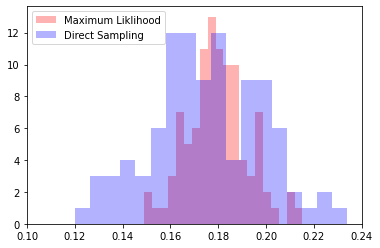

In [57]:
plt.figure()
plt.hist(ans_list, bins=20,alpha=0.3, color='r', label="Maximum Liklihood")
plt.hist(ans_list2, bins=20,alpha=0.3, color='b', label="Direct Sampling")

plt.xlim([0.1, 0.24])
plt.legend()

最尤推定を用いた方法の方がばらつき少なく推定できていることが確認できます。  
以上より、量子位相推定を用いない量子振幅推定により、数値積分を行うことができました。

最尤推定においては尤度関数の最大化に要する計算量や、局所最大値の存在を考慮する必要があります。  
上記の実装例では optuna の試行回数 n_trials を小さくすると、最尤推定が局所解にはまり推定精度が大きく悪化します。